In [1]:
import functions as f

## overall analysis

DataFrame shape: (3329, 66)

Columns: ['aidsystem', 'alt_name', 'alt_name_lang', 'api', 'api_apitype', 'certificate', 'citationguidelineurl', 'contenttype', 'contenttypescheme', 'dataaccessrestriction', 'dataaccesstype', 'databaseaccessrestriction', 'databaseaccesstype', 'databaselicensename', 'databaselicenseurl', 'datalicensename', 'datalicenseurl', 'datauploadlicensename', 'datauploadlicenseurl', 'datauploadrestriction', 'datauploadtype', 'description', 'description_lang', 'enddate', 'enhancedpublication', 'entrydate', 'institutionalt_name', 'institutionalt_name_lang', 'institutioncountry', 'institutionidentifier', 'institutionname', 'institutionname_lang', 'institutiontype', 'institutionurl', 'keyword', 'lastupdate', 'metadatastandardname', 'metadatastandardscheme', 'metadatastandardurl', 'missionstatementurl', 'pidsystem', 'policyname', 'policyurl', 'providertype', 'qualitymanagement', 're3data_orgidentifier', 'remarks', 'repocontact', 'repoidentifier', 'repolang', 'reponame', 're

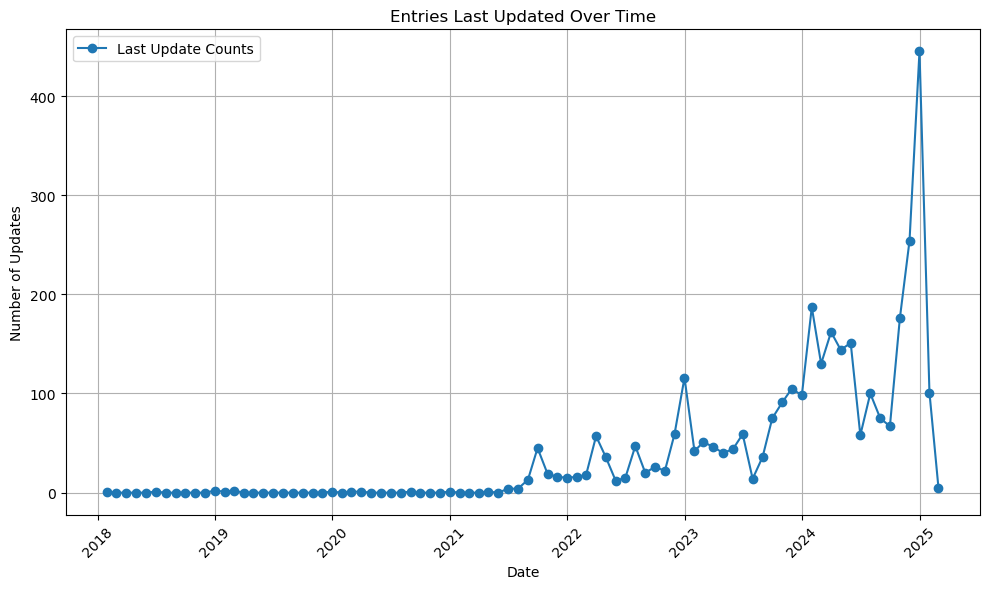

Column institutioncountry has been selected.
Statistics for institutioncountry written to Excel sheet.


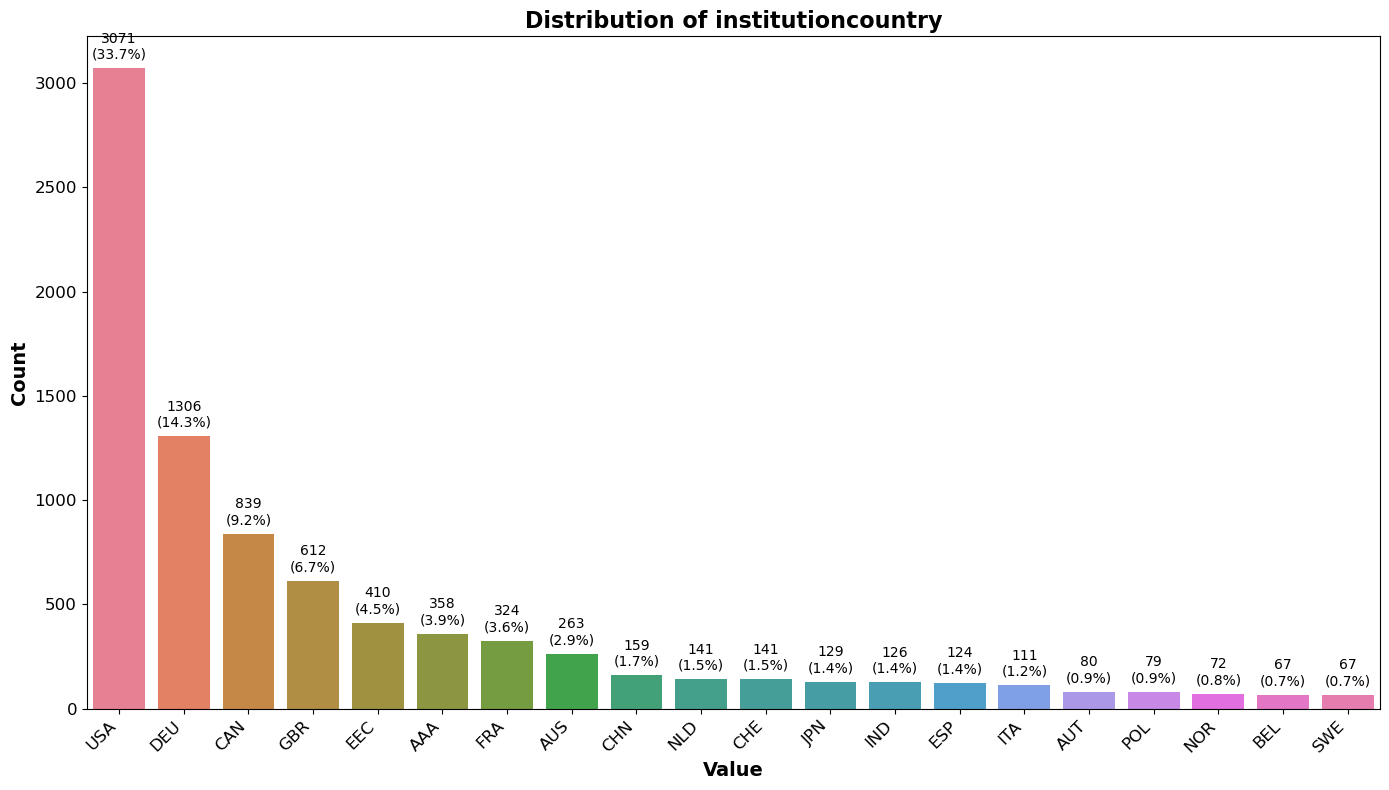

Column repolang has been selected.
Statistics for repolang written to Excel sheet.


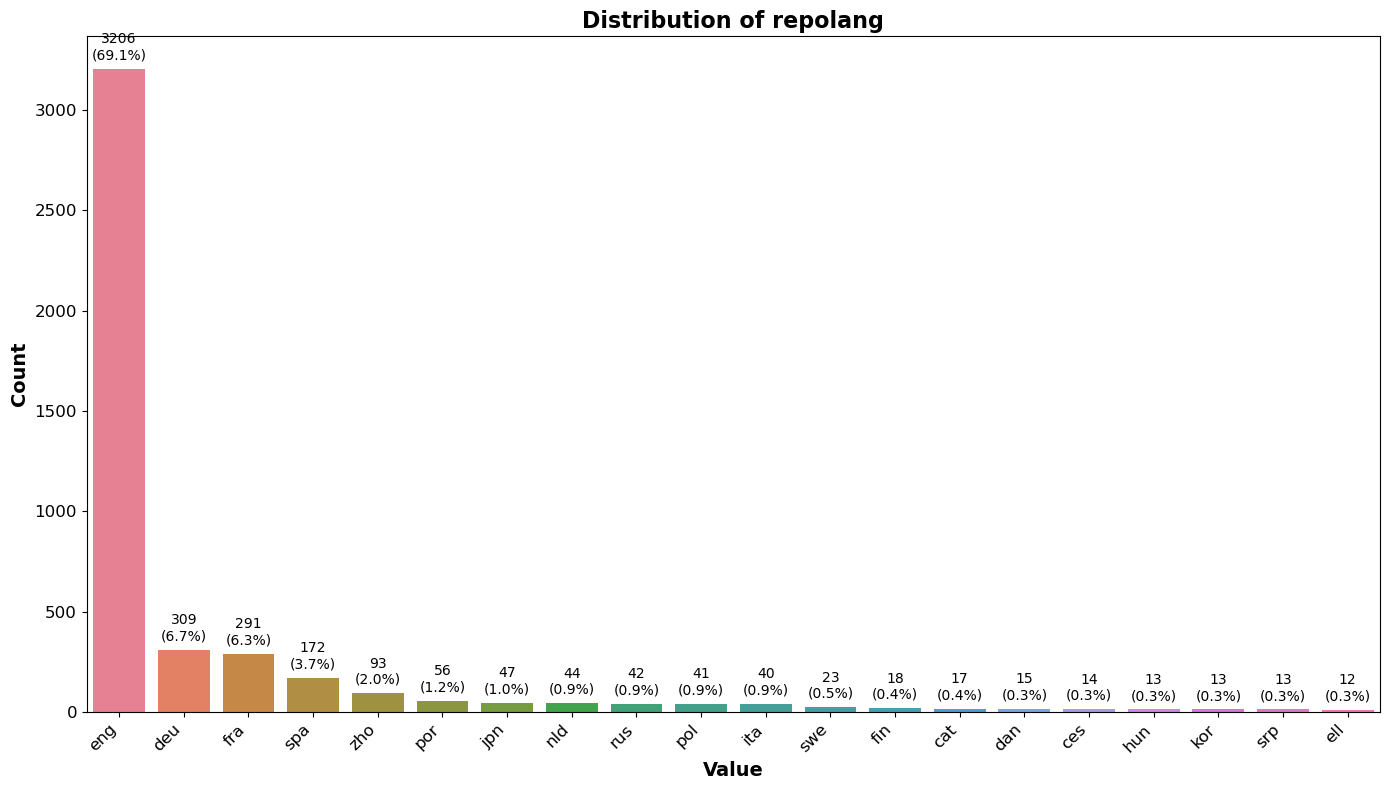

Column subject has been selected.
Statistics for subject written to Excel sheet.


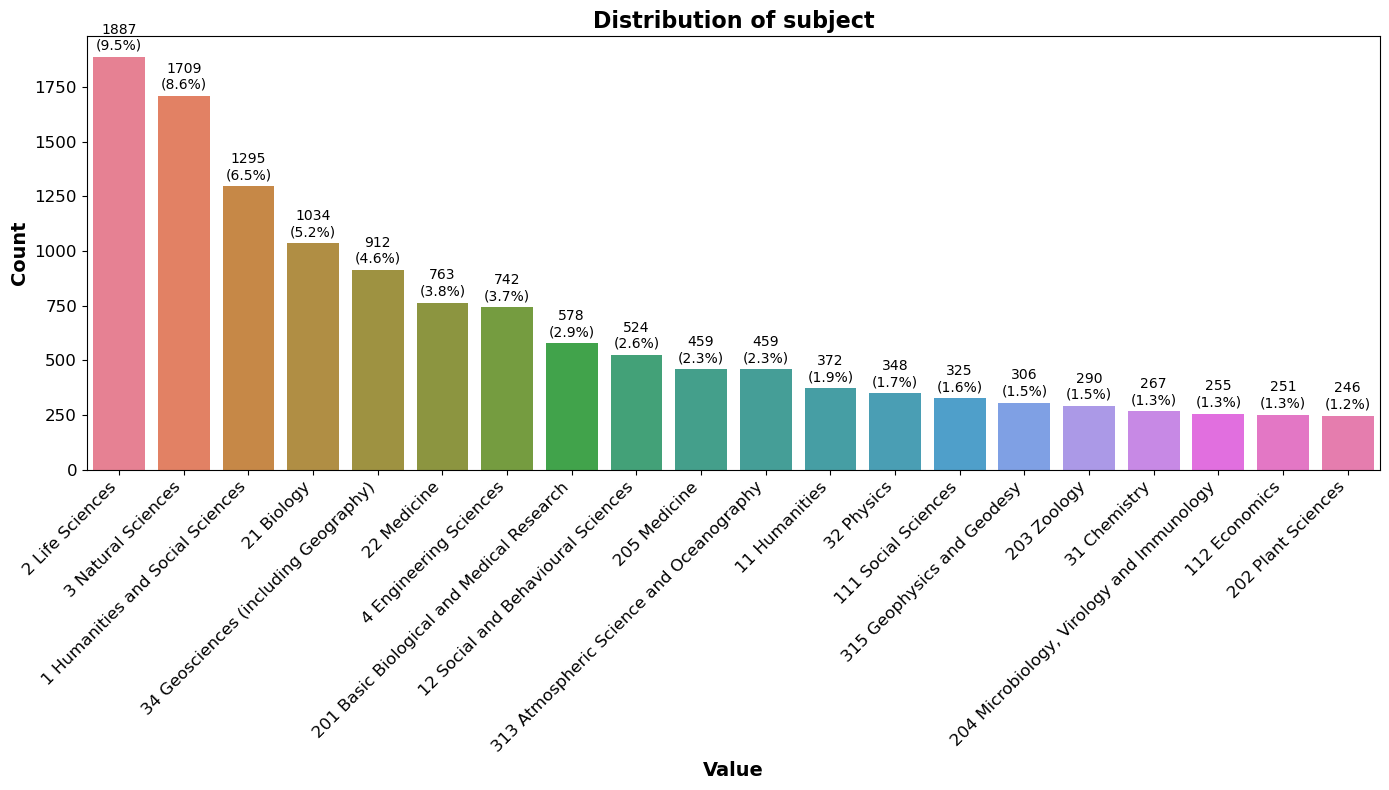

Column subjectscheme has been selected.
Statistics for subjectscheme written to Excel sheet.


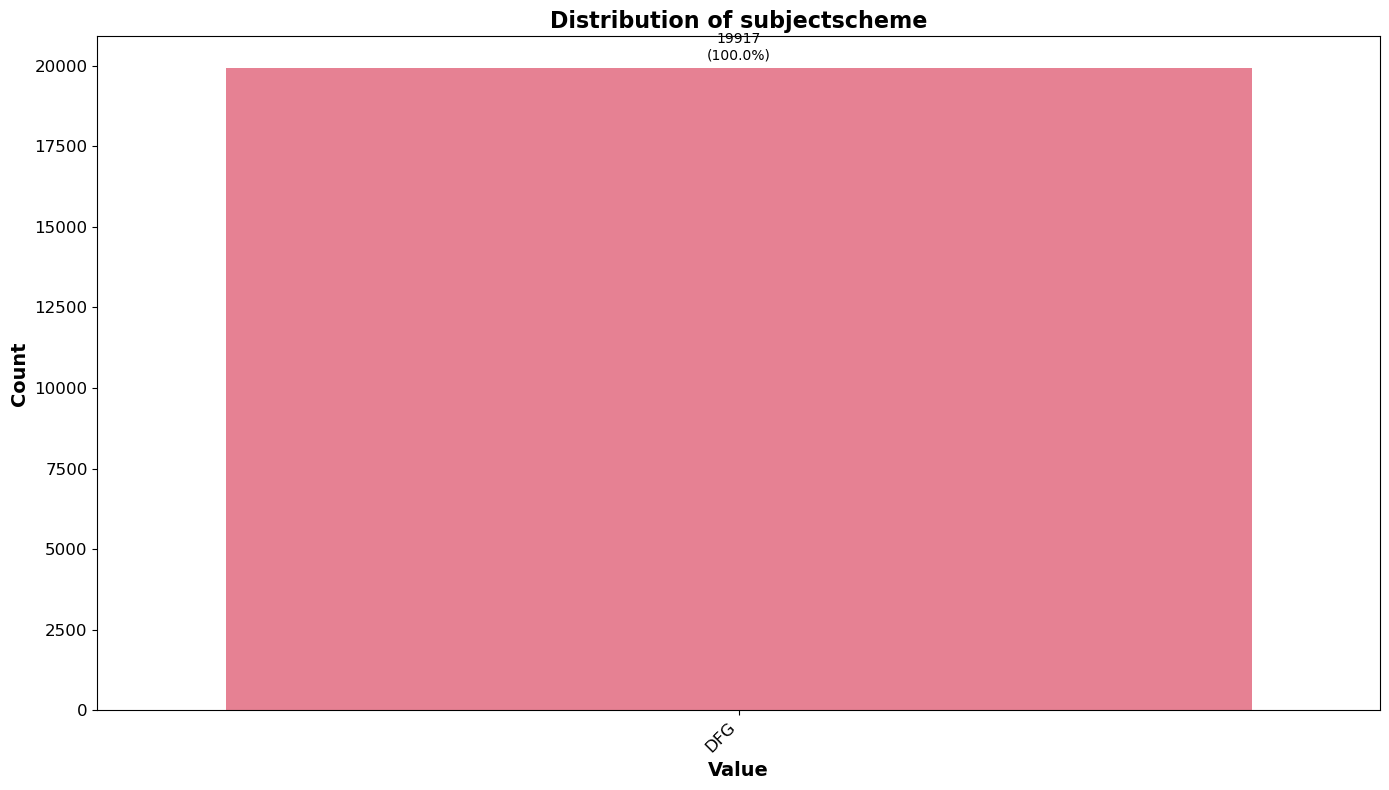

Column api_apitype has been selected.
Statistics for api_apitype written to Excel sheet.


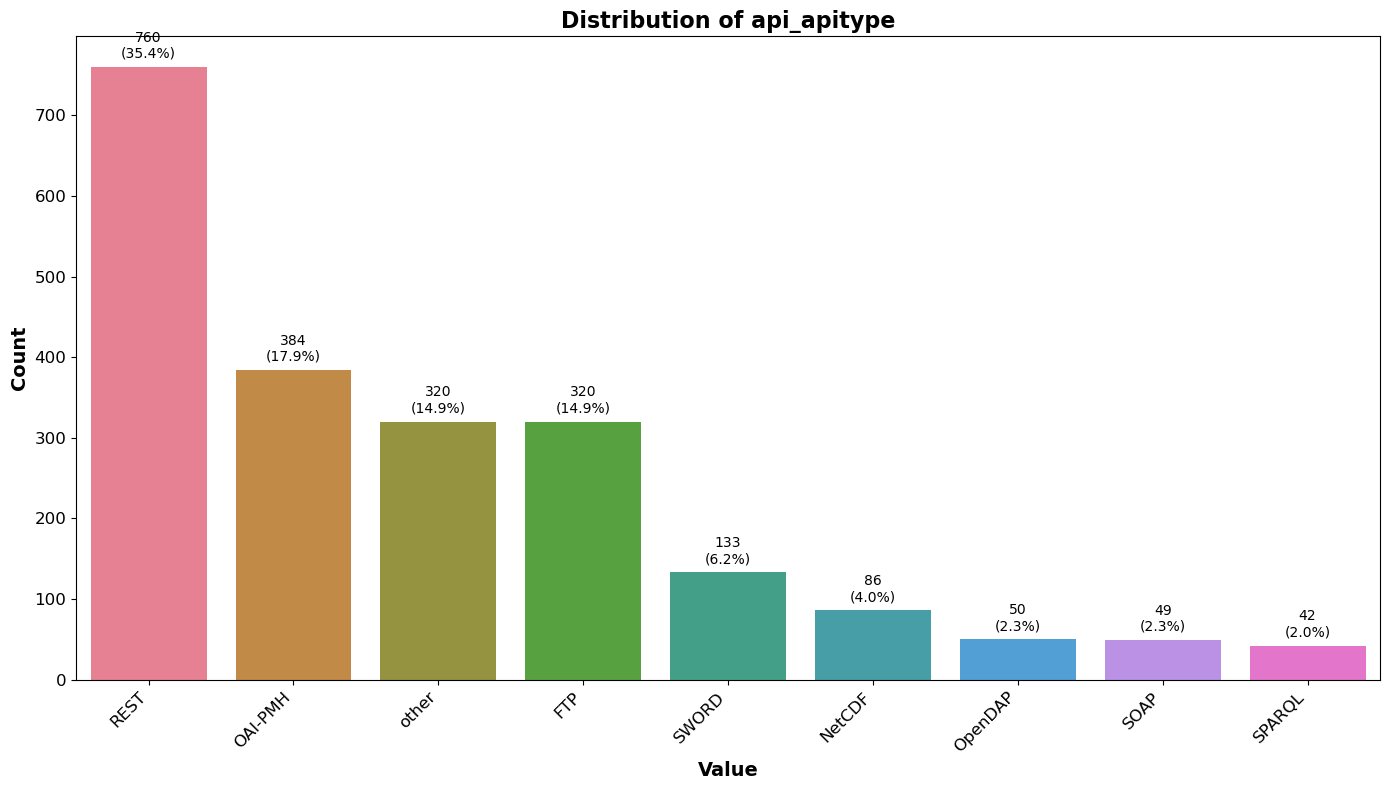

Column metadatastandardname has been selected.
Statistics for metadatastandardname written to Excel sheet.


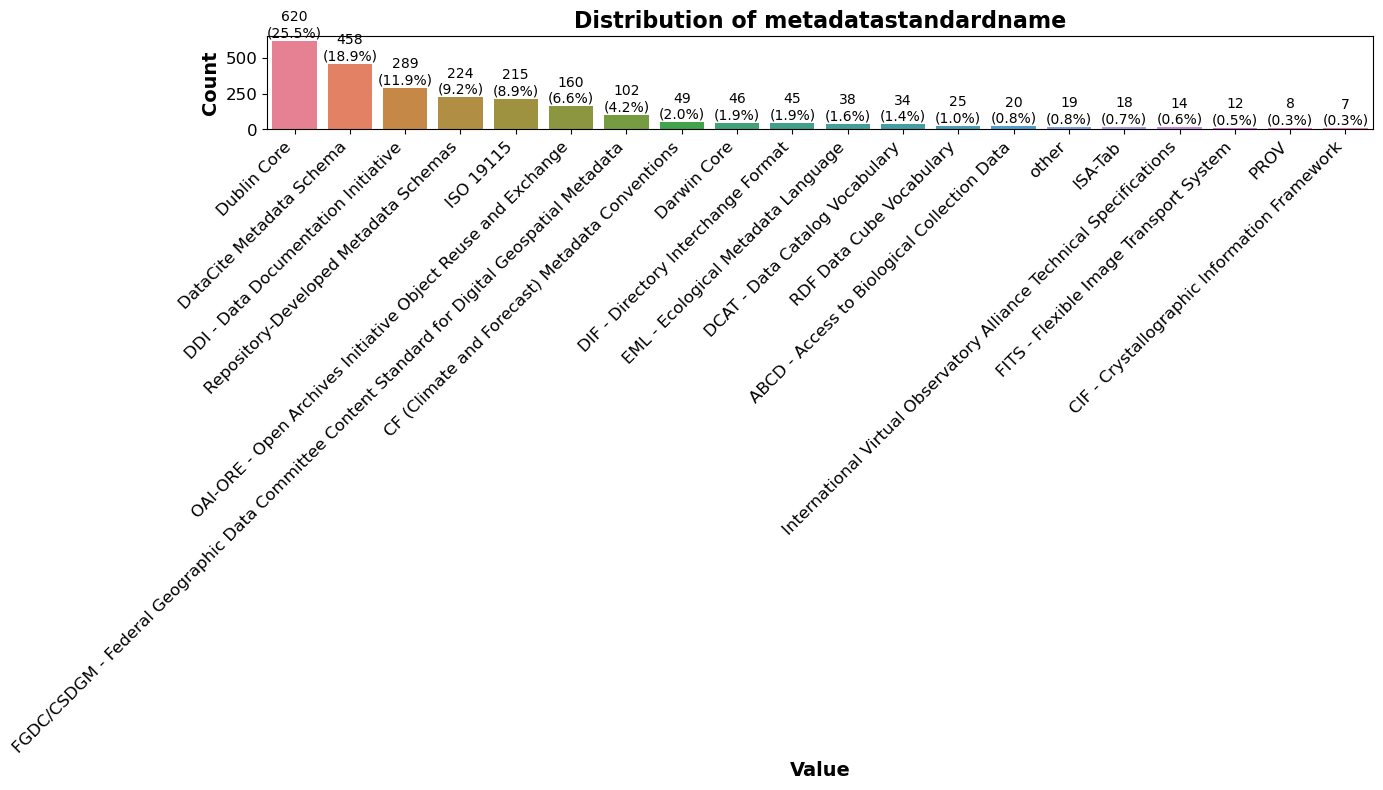

Column metadatastandardscheme has been selected.
Statistics for metadatastandardscheme written to Excel sheet.


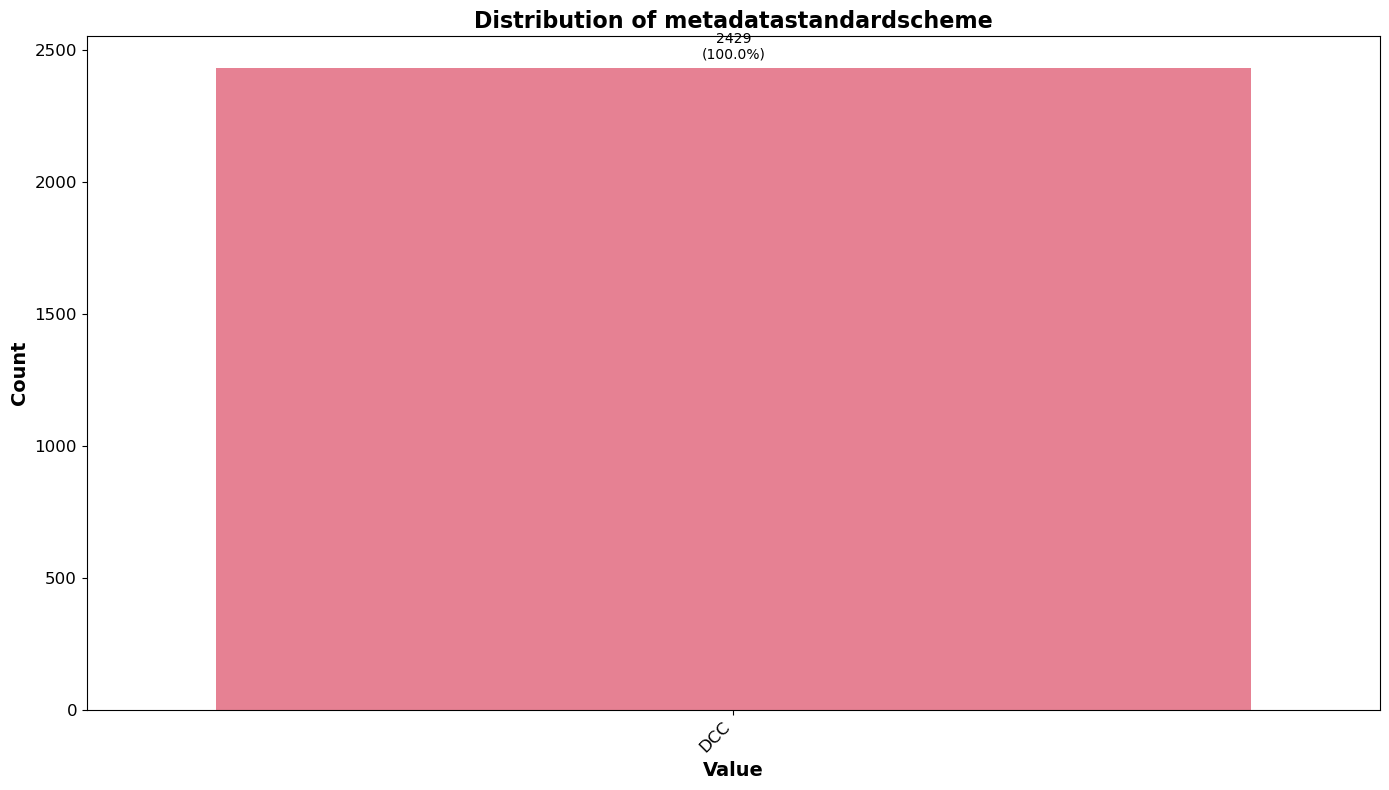

Column qualitymanagement has been selected.
Statistics for qualitymanagement written to Excel sheet.


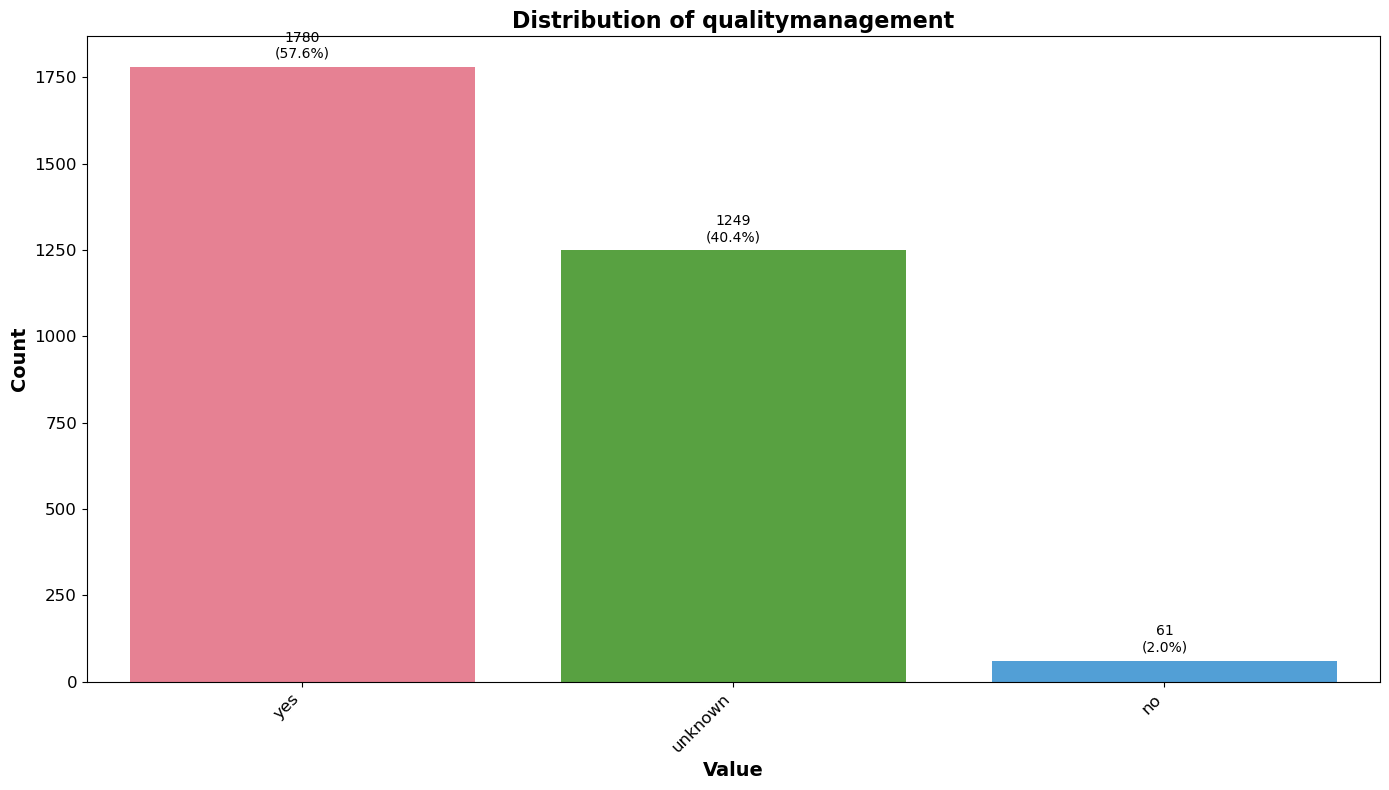

Column datauploadtype has been selected.
Statistics for datauploadtype written to Excel sheet.


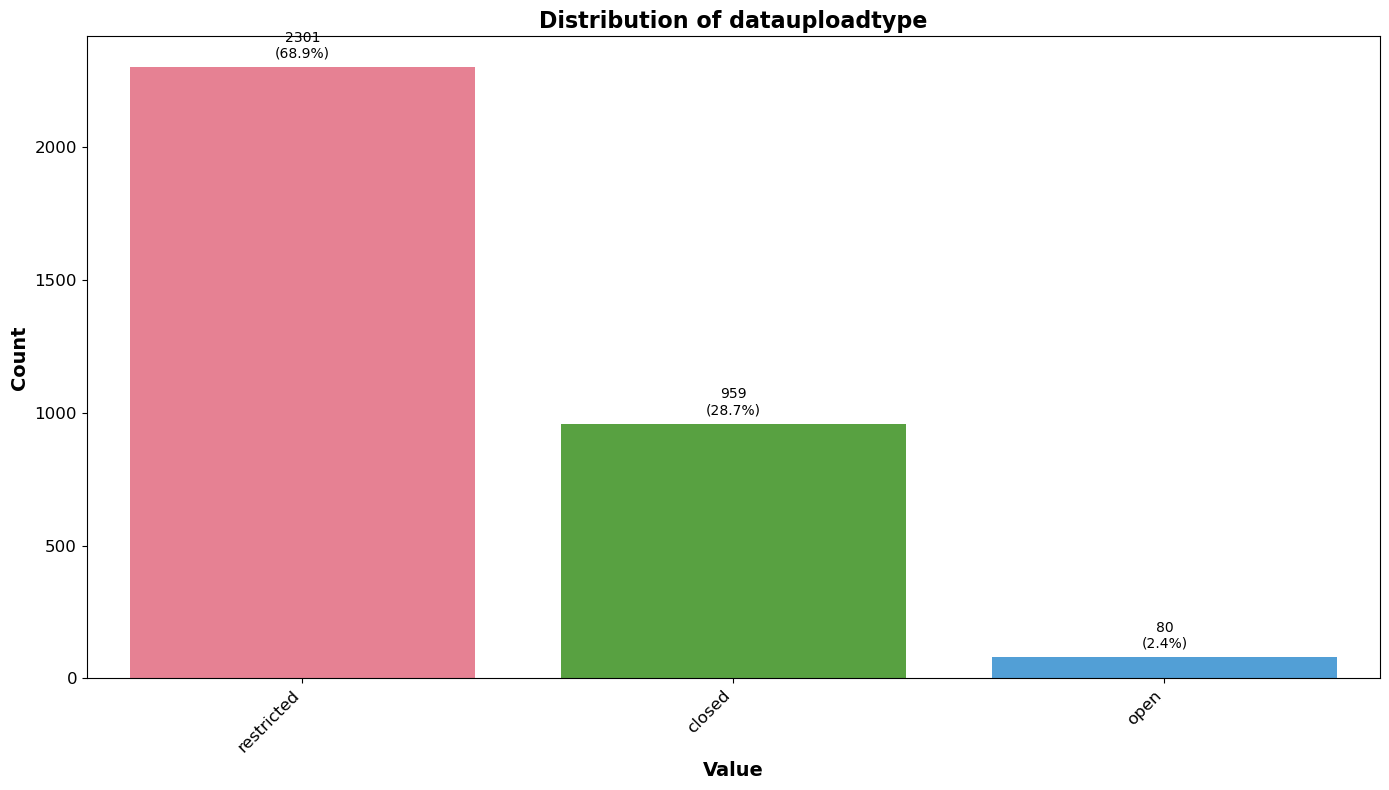

Column datauploadrestriction has been selected.
Statistics for datauploadrestriction written to Excel sheet.


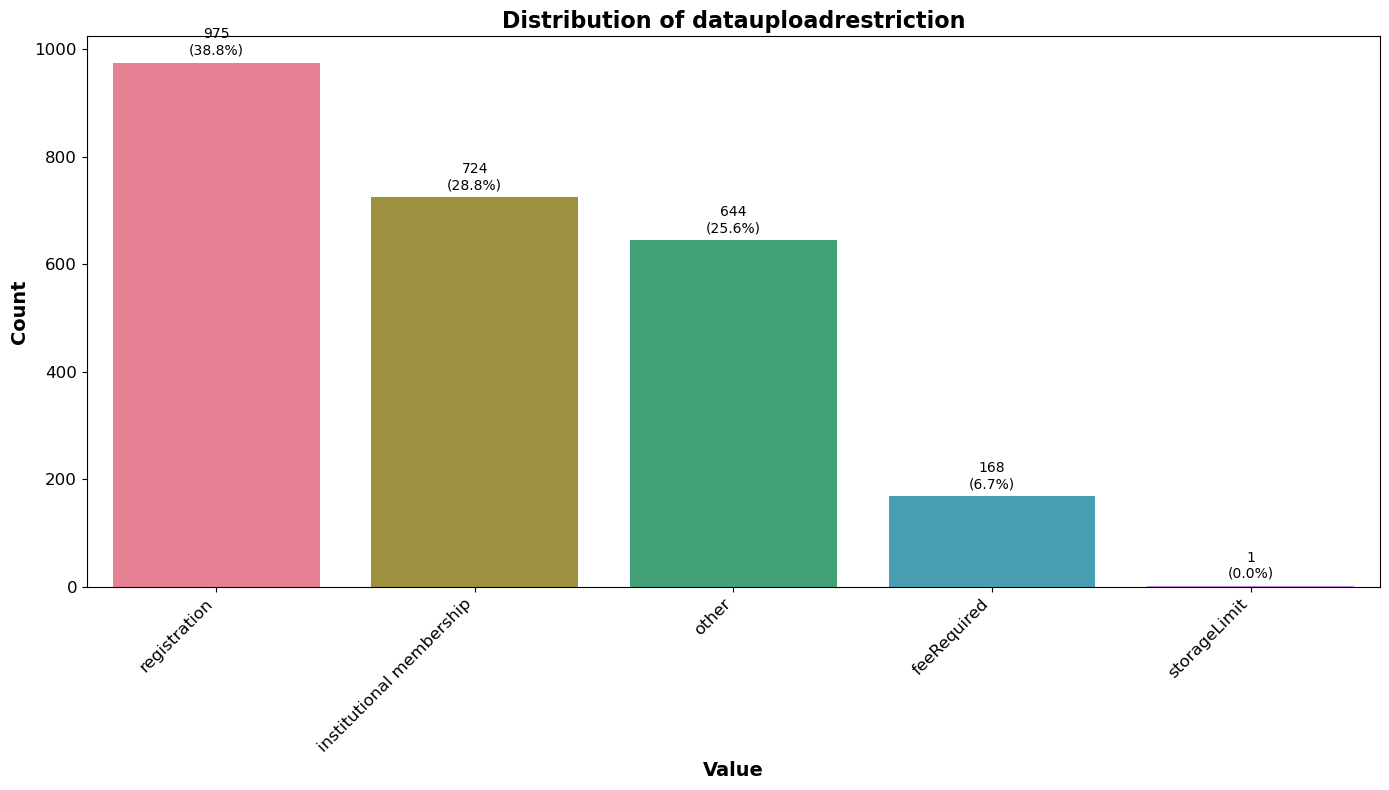

Column datauploadlicensename has been selected.
Statistics for datauploadlicensename written to Excel sheet.


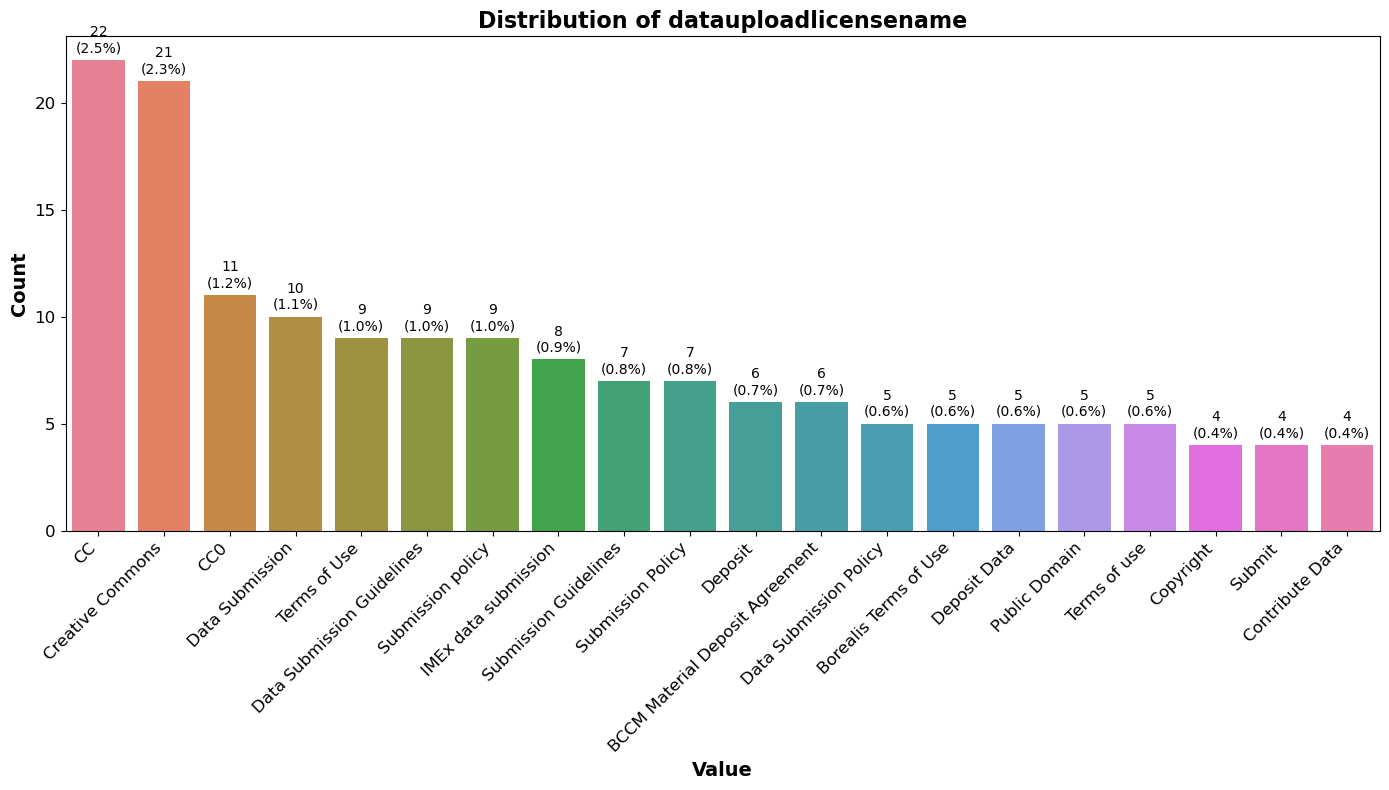

Column datalicensename has been selected.
Statistics for datalicensename written to Excel sheet.


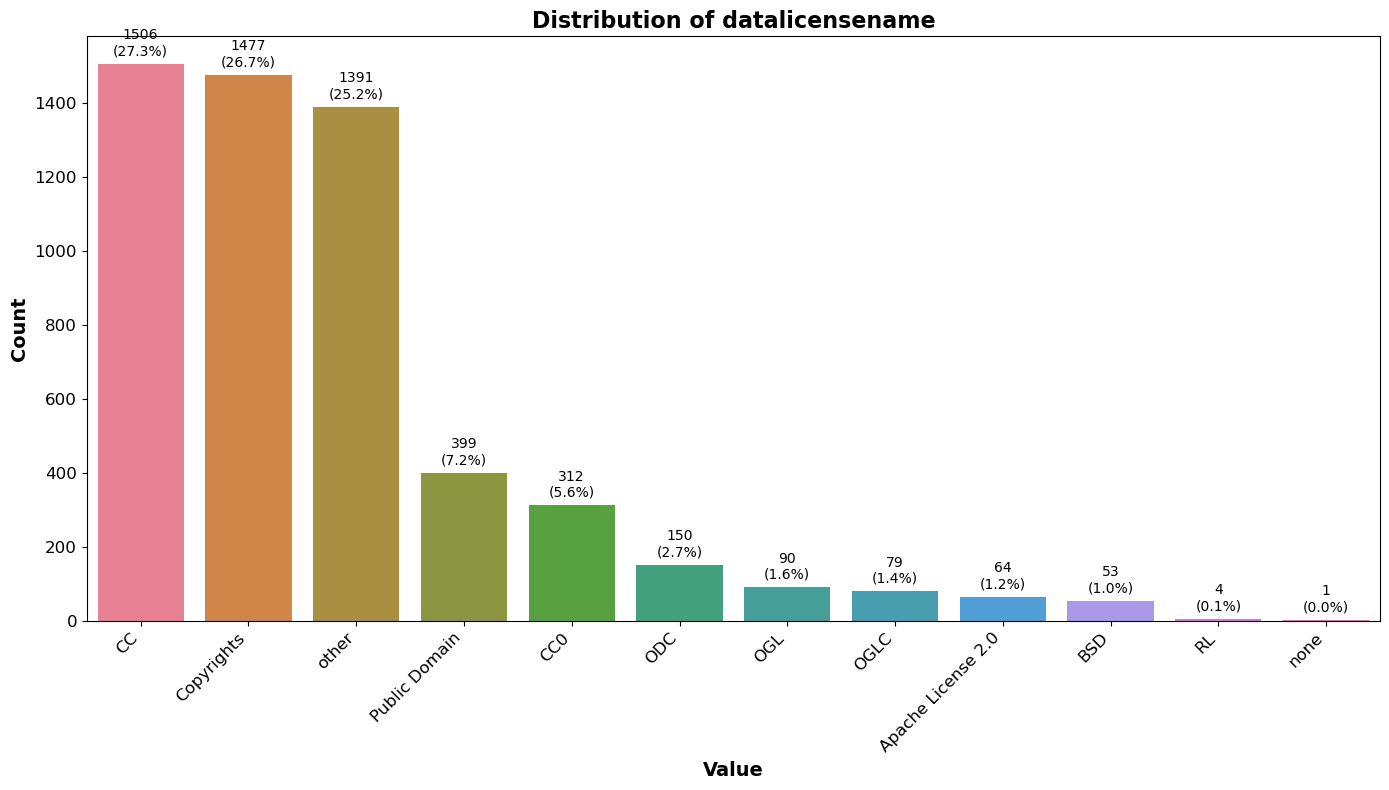

Column dataaccessrestriction has been selected.
Statistics for dataaccessrestriction written to Excel sheet.


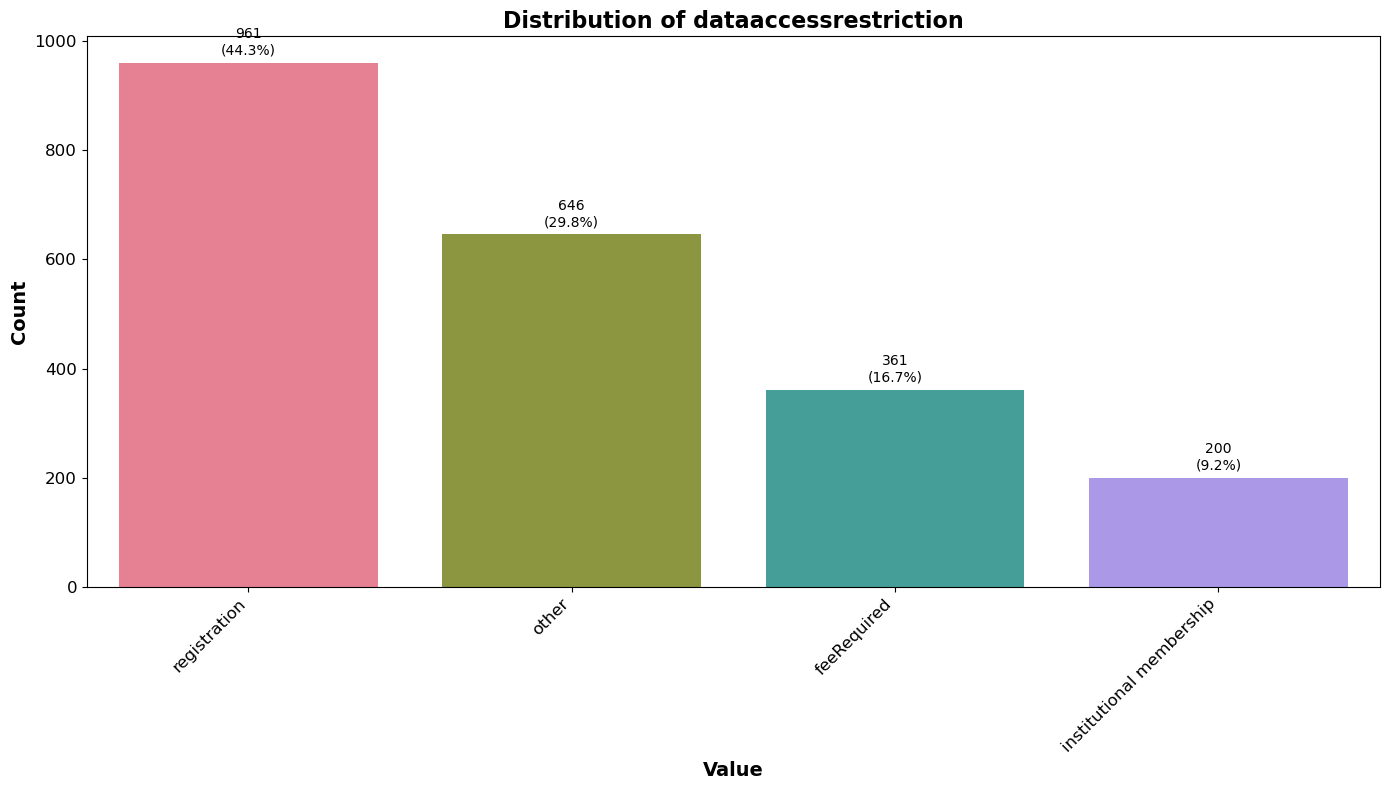

Column dataaccesstype has been selected.
Statistics for dataaccesstype written to Excel sheet.


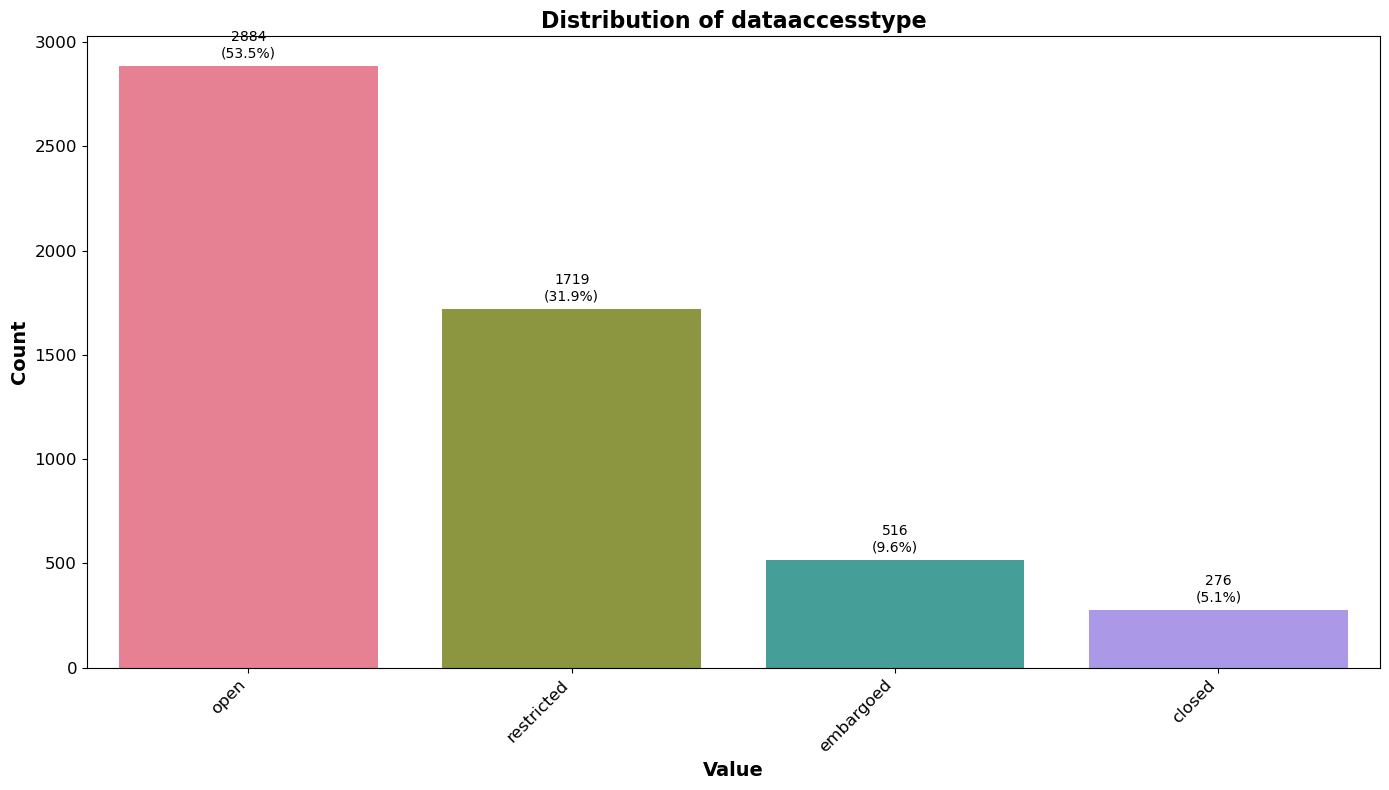

Column databaseaccessrestriction has been selected.
Statistics for databaseaccessrestriction written to Excel sheet.


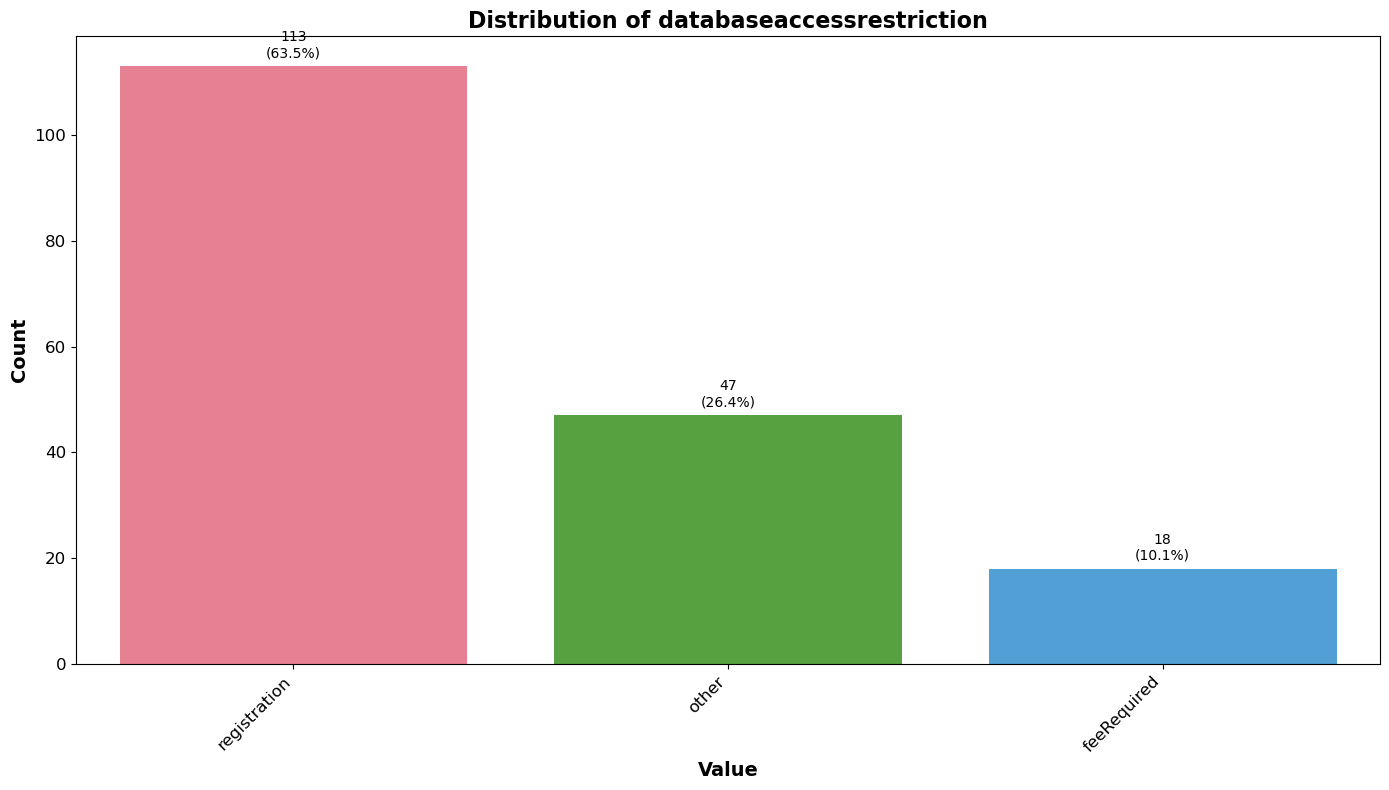

Column databaseaccesstype has been selected.
Statistics for databaseaccesstype written to Excel sheet.


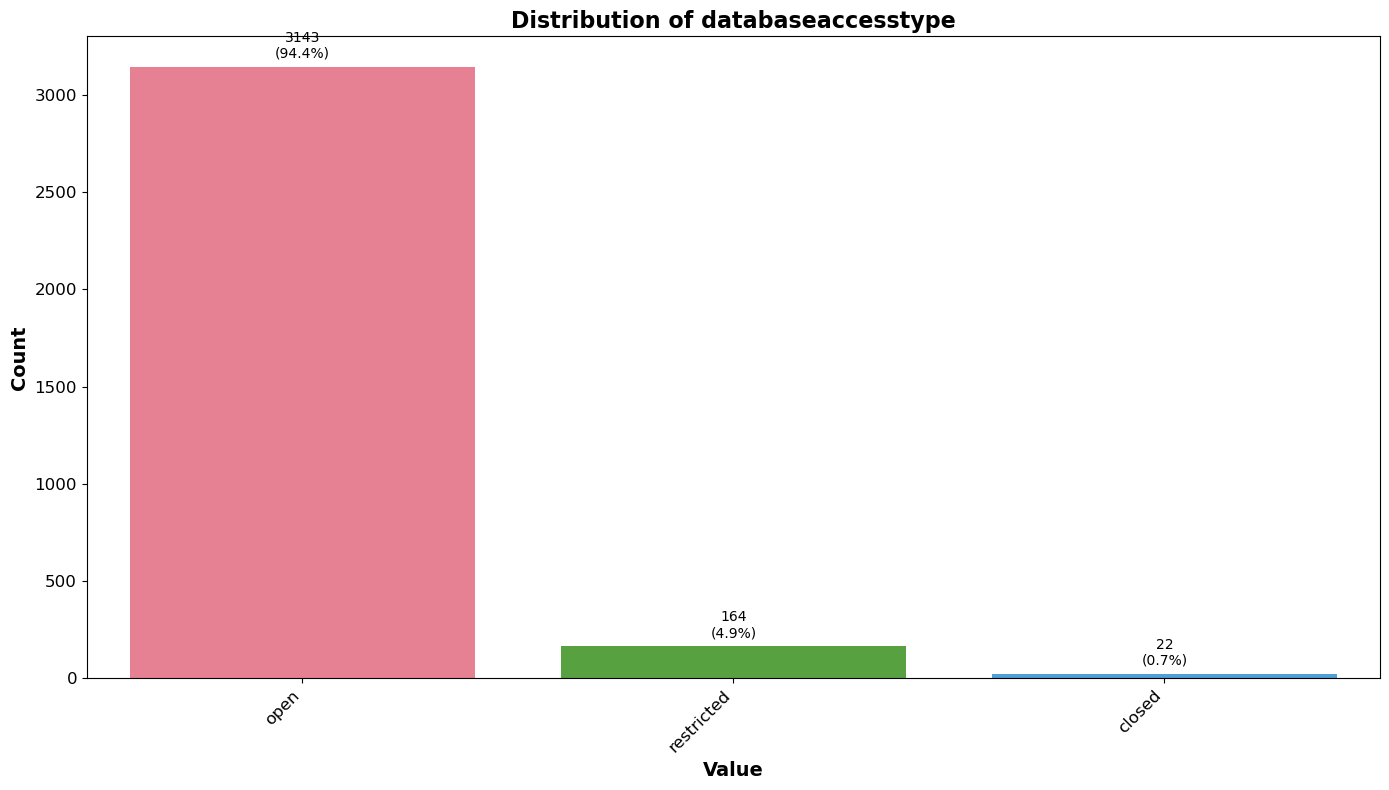

Column certificate has been selected.
Statistics for certificate written to Excel sheet.


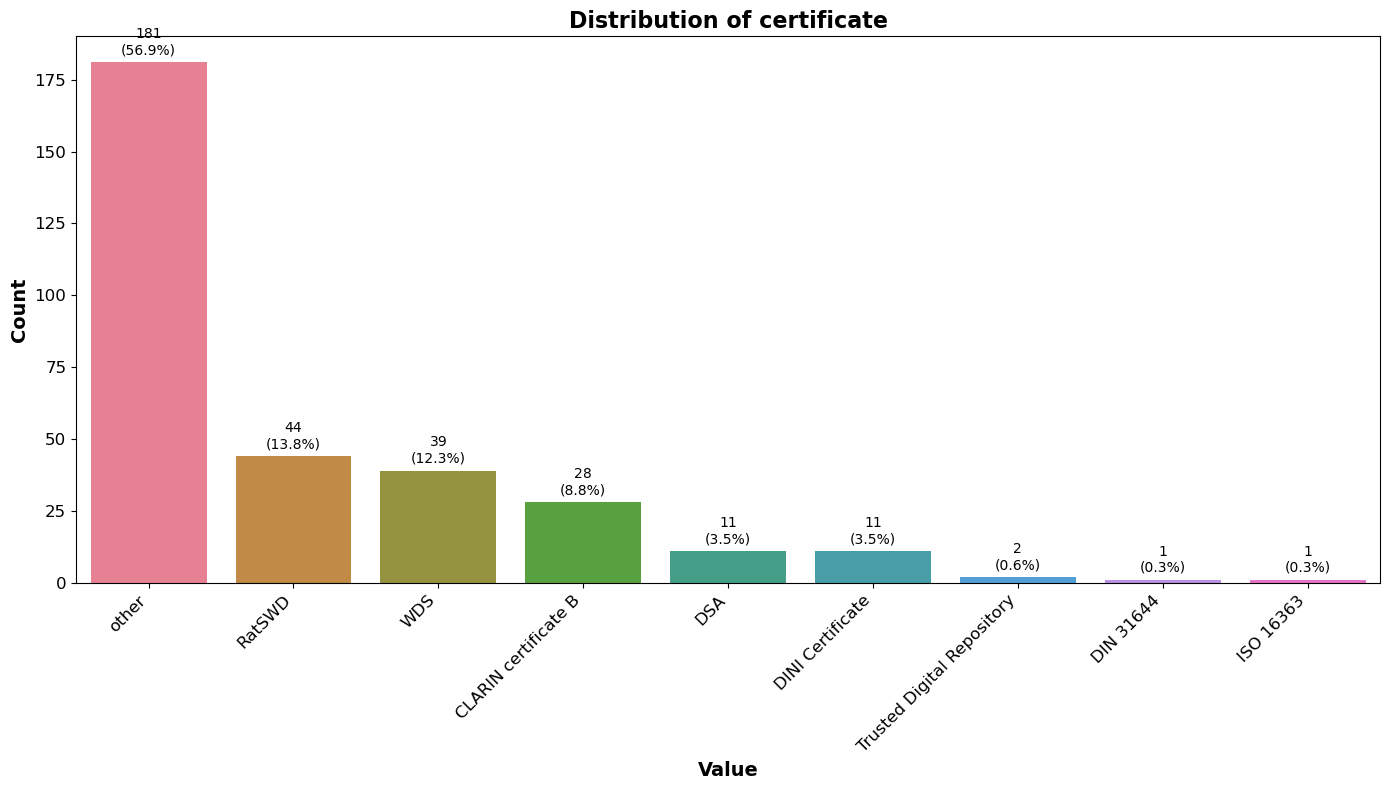

Column pidsystem has been selected.
Statistics for pidsystem written to Excel sheet.


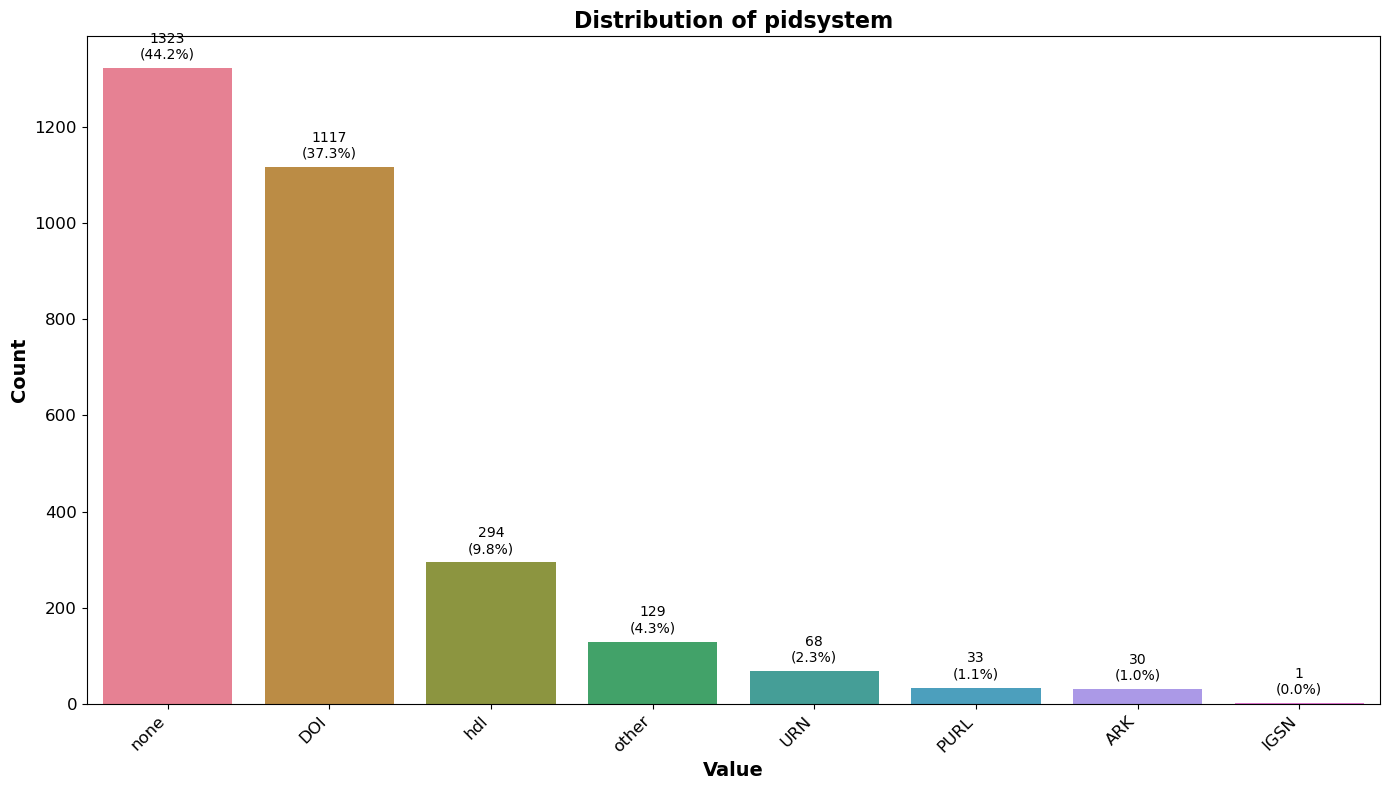

Column aidsystem has been selected.
Statistics for aidsystem written to Excel sheet.


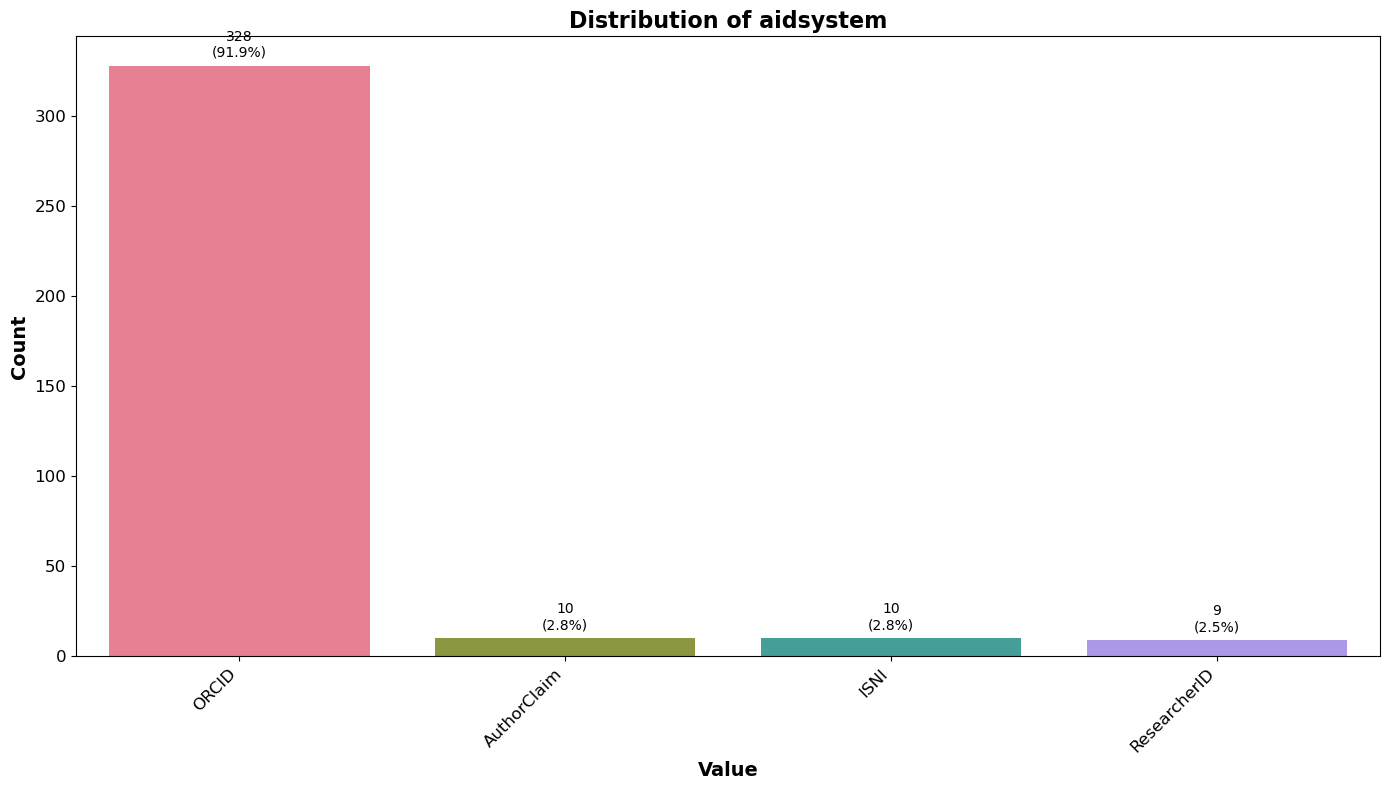

All statistics have been saved to columns_distribution.xlsx.
Filtered dataset saved to most_complete_repo_list.csv
Top 30 most complete rows saved to top_30_most_complete_rows.csv


In [2]:
# Update the corresponding file paths as needed.
xml_file_path = 're3dataDatabase-Complete-2025-02-06 20.15.53.txt'

# Parse the XML file.
soup_data = f.parse_xml_file(xml_file_path)

# Convert the parsed XML data to a DataFrame and capture list-type columns.
df, list_columns = f.xml_to_dataframe(soup_data)

# Extract the relevant DRA columns.
dra_df = f.extract_dra_columns(df)

# Display basic DataFrame information.
print("DataFrame shape:", df.shape)
print("\nColumns:", sorted(df.columns.tolist()))

# 1. Count the number of entries that were never updated.
f.count_nonupdated_entries(df)

# 2. Plot monthly update counts.
f.plot_update_history(df, frequency='M')

# Generate and visualize distribution statistics for DRA columns.
f.generate_column_distribution_stats(dra_df)

# Save all rows with no missing values to a CSV file.
complete_df = f.save_complete_dataset(dra_df)

# Save the top 30 rows sorted by the number of non-missing values.
top_30_df = f.save_top_complete_rows(df, top_n=30)


## WDS member analysis


In [3]:
import pandas as pd
import numpy as np

In [4]:
WDS_record = pd.read_csv('WDS-member-directory - WDS-member-directory.csv')

In [5]:
WDS_record

,members,member-type,institution,Re3data records,Re3data id,Notes
0,Académie des Sciences,Associate,NaN,NaN,NaN,NaN
1,Arab Council for the Social Sciences,Associate,NaN,https://www.re3data.org/repository/r3d100013586,r3d100013586,NaN
2,Byurakan Astrophysical Observatory,Associate,Republic of Armenia,NaN,NaN,NaN
3,Chilean Virtual Observatory,Associate,Universidad Técnica Federico Santa María,NaN,NaN,NaN
4,Committee on Electronic Information and Commun...,Associate,International Mathematical Union,NaN,NaN,NaN
...,...,...,...,...,...,...
138,Worldwide Protein Data Bank,Regular,Research Collaboratory for Structural Bioinfor...,https://www.re3data.org/repository/r3d100011104,r3d100011104,NaN
139,NaN,NaN,NaN,NaN,NaN,NaN
140,NaN,NaN,NaN,NaN,NaN,NaN
141,World Data Service for Geophysics,Regular,NOAA National Centers for Environmental Inform...,https://www.re3data.org/repository/r3d100010292,r3d100010292,????


In [6]:
unwanted = [
    'World Data Service for Geophysics', 
    'World Data Service for Oceanography'
]

# 1. Filter wds_df for 'Regular' member-type and remove unwanted members
filtered_wds = WDS_record[
    (WDS_record['member-type'] == 'Regular') &
    (~WDS_record['members'].isin(unwanted))
].copy()

# 2. Ensure 'Re3data id' is a list, then explode the column
filtered_wds['Re3data id'] = filtered_wds['Re3data id'].apply(
    lambda x: x if isinstance(x, list) else [x]
)
exploded_ids = filtered_wds.explode('Re3data id')['Re3data id'].unique()

# 3. Filter dra_df based on the exploded identifiers from wds_df
WDS_df = dra_df[dra_df['re3data_orgidentifier'].isin(exploded_ids)]

In [7]:
WDS_df['pidsystem']

0              DOI
4              DOI
7       [DOI, hdl]
10            none
24             DOI
           ...    
2471           DOI
2482    [ARK, DOI]
2591           DOI
2620           DOI
2656           NaN
Name: pidsystem, Length: 93, dtype: object

Column institutioncountry has been selected.
Statistics for institutioncountry written to Excel sheet.


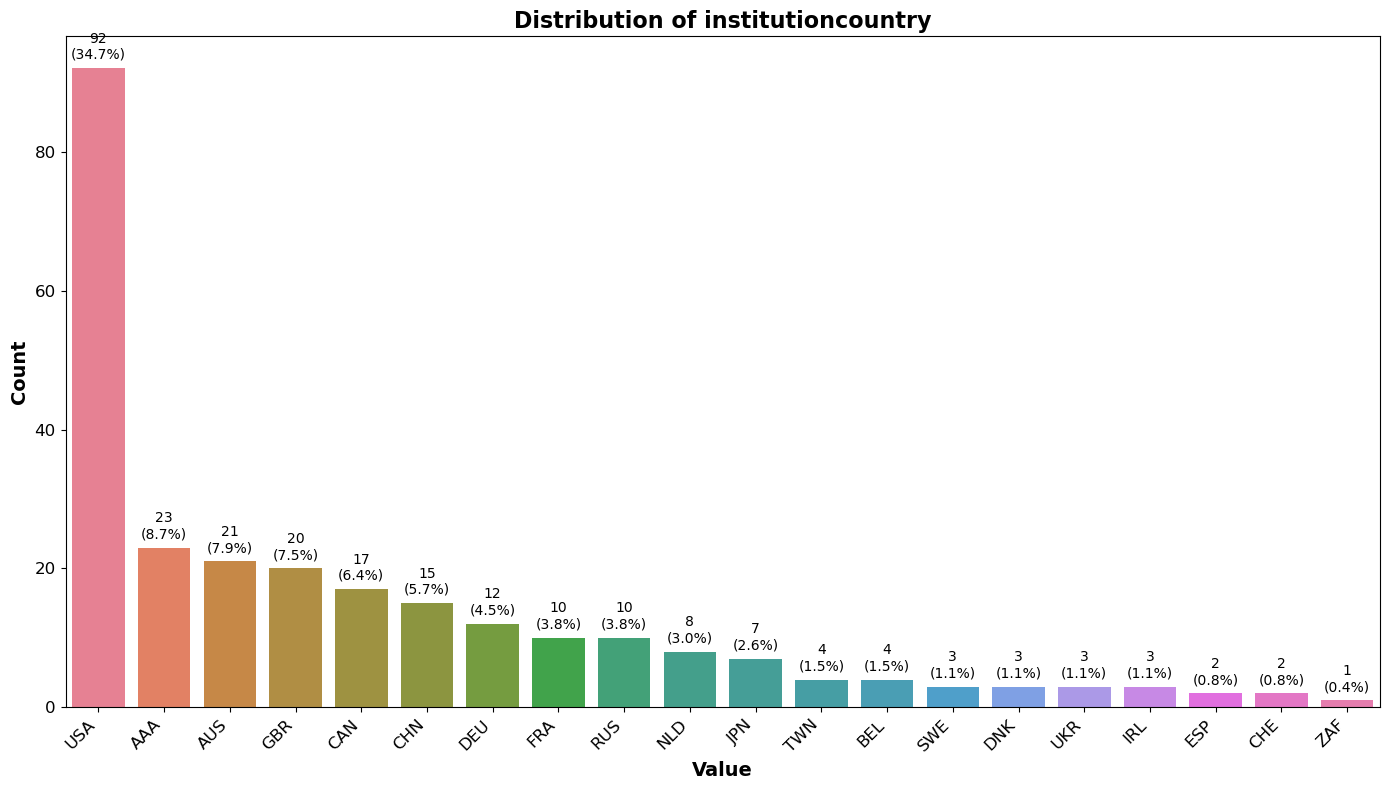

Column repolang has been selected.
Statistics for repolang written to Excel sheet.


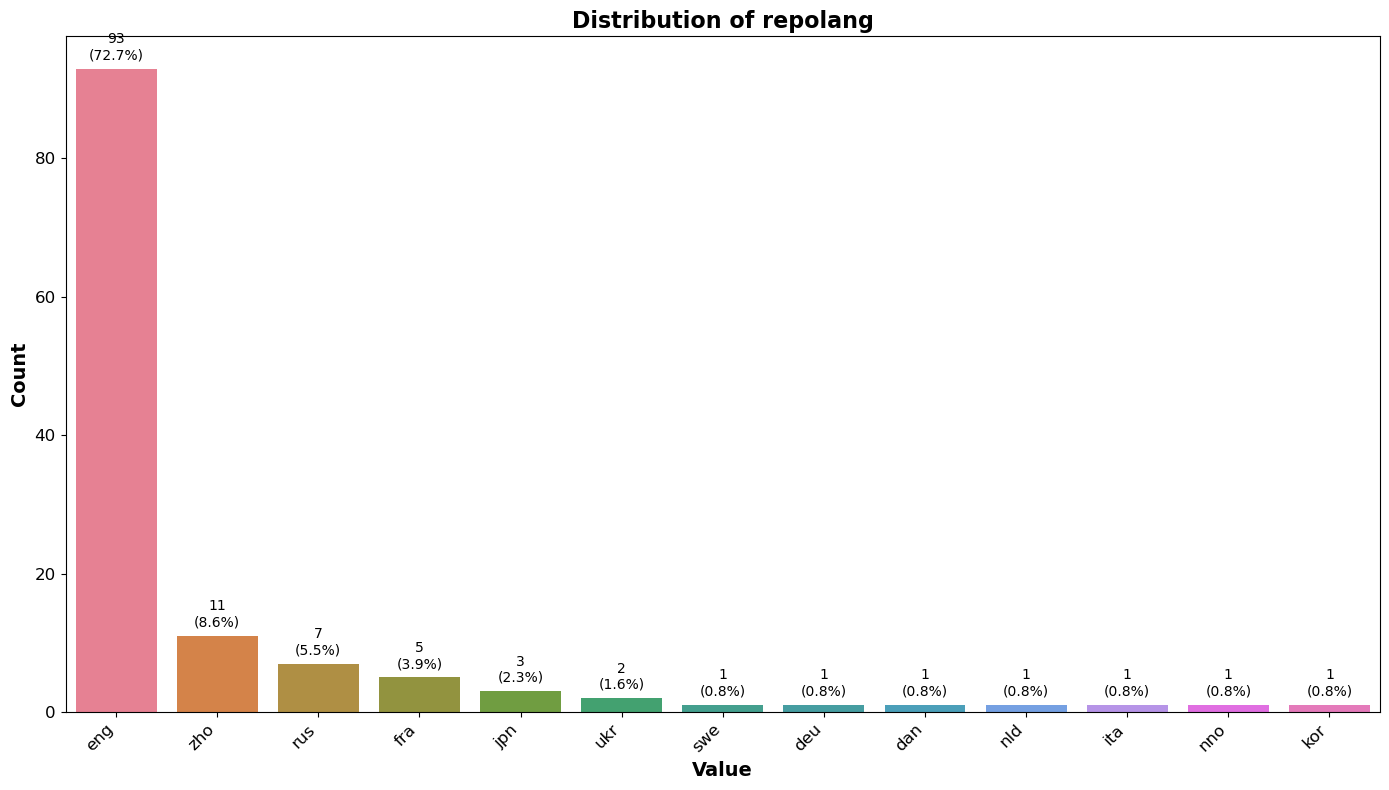

Column subject has been selected.
Statistics for subject written to Excel sheet.


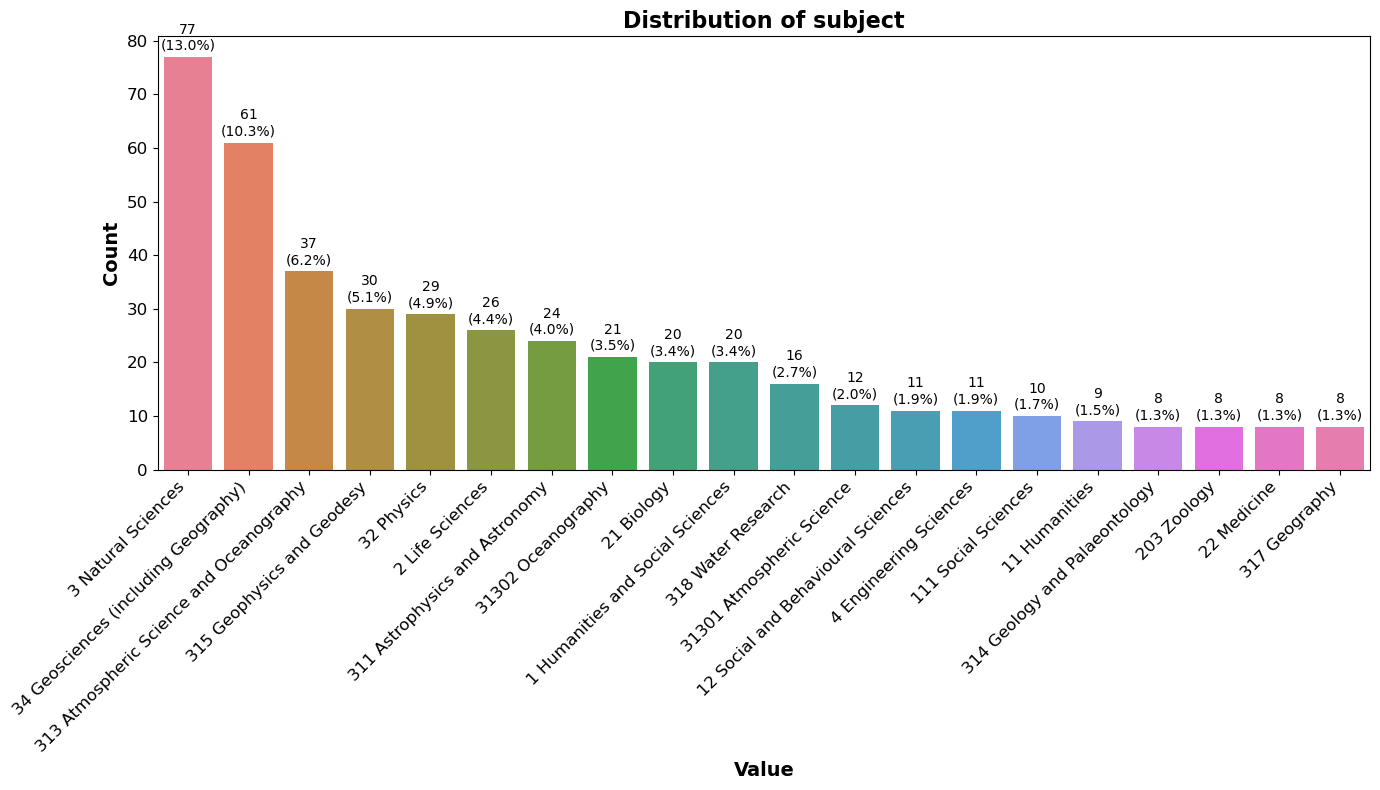

Column subjectscheme has been selected.
Statistics for subjectscheme written to Excel sheet.


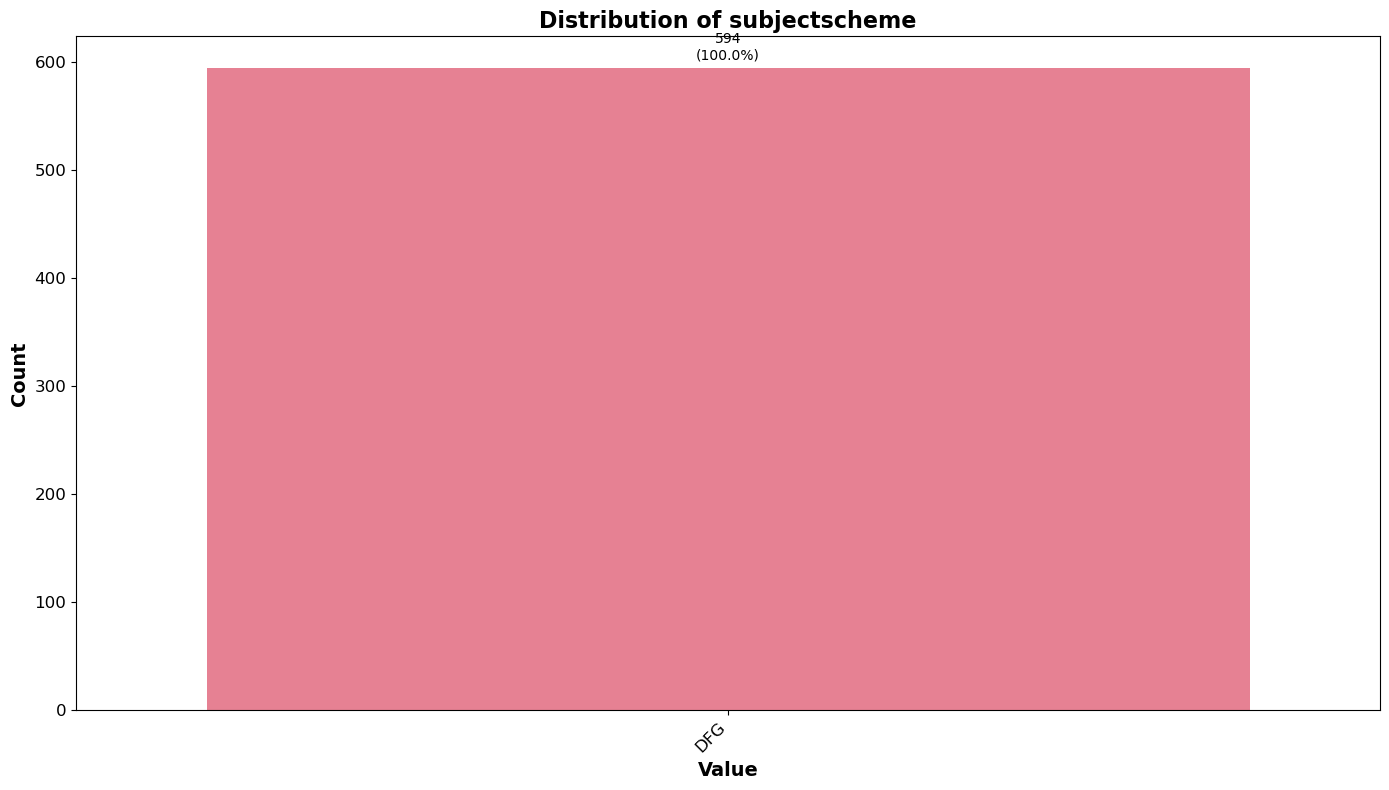

Column api_apitype has been selected.
Statistics for api_apitype written to Excel sheet.


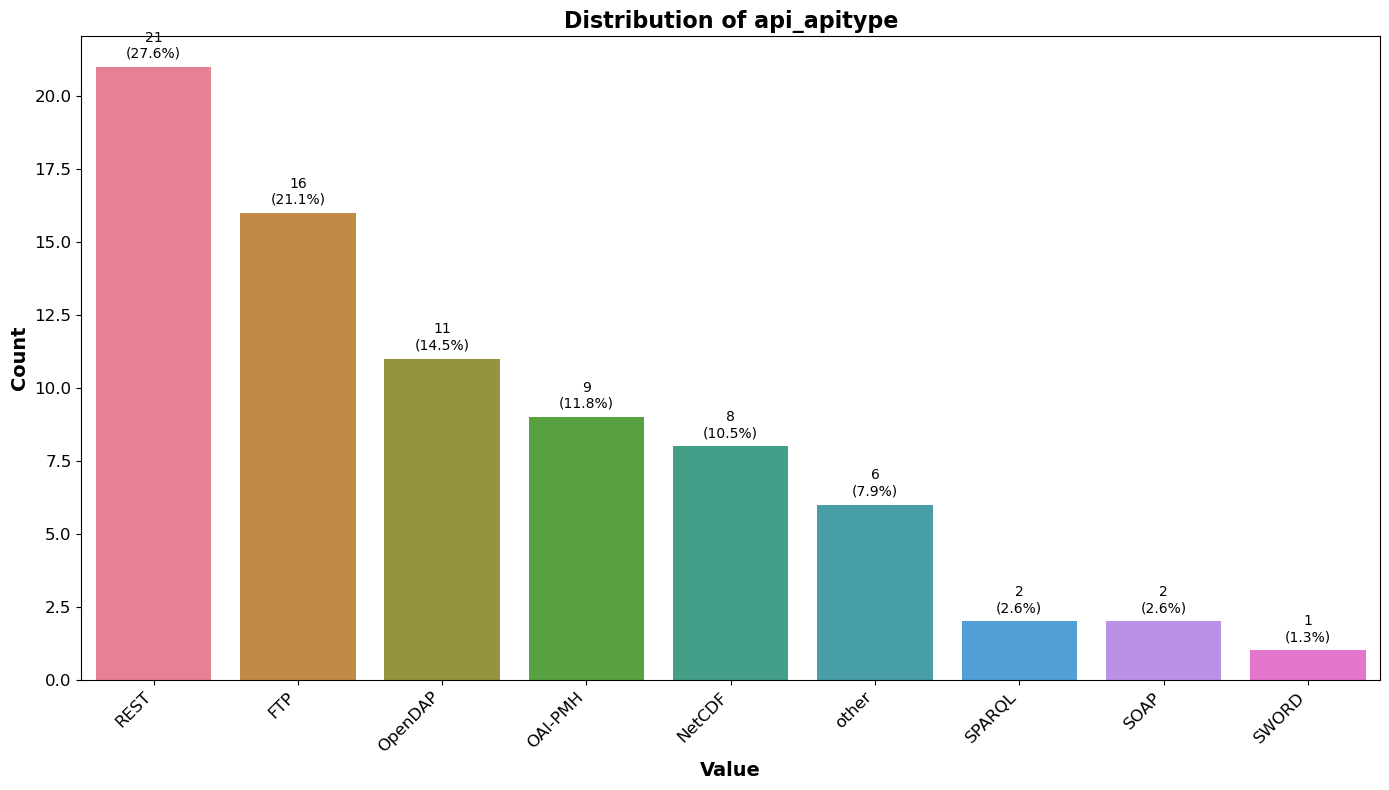

Column metadatastandardname has been selected.
Statistics for metadatastandardname written to Excel sheet.


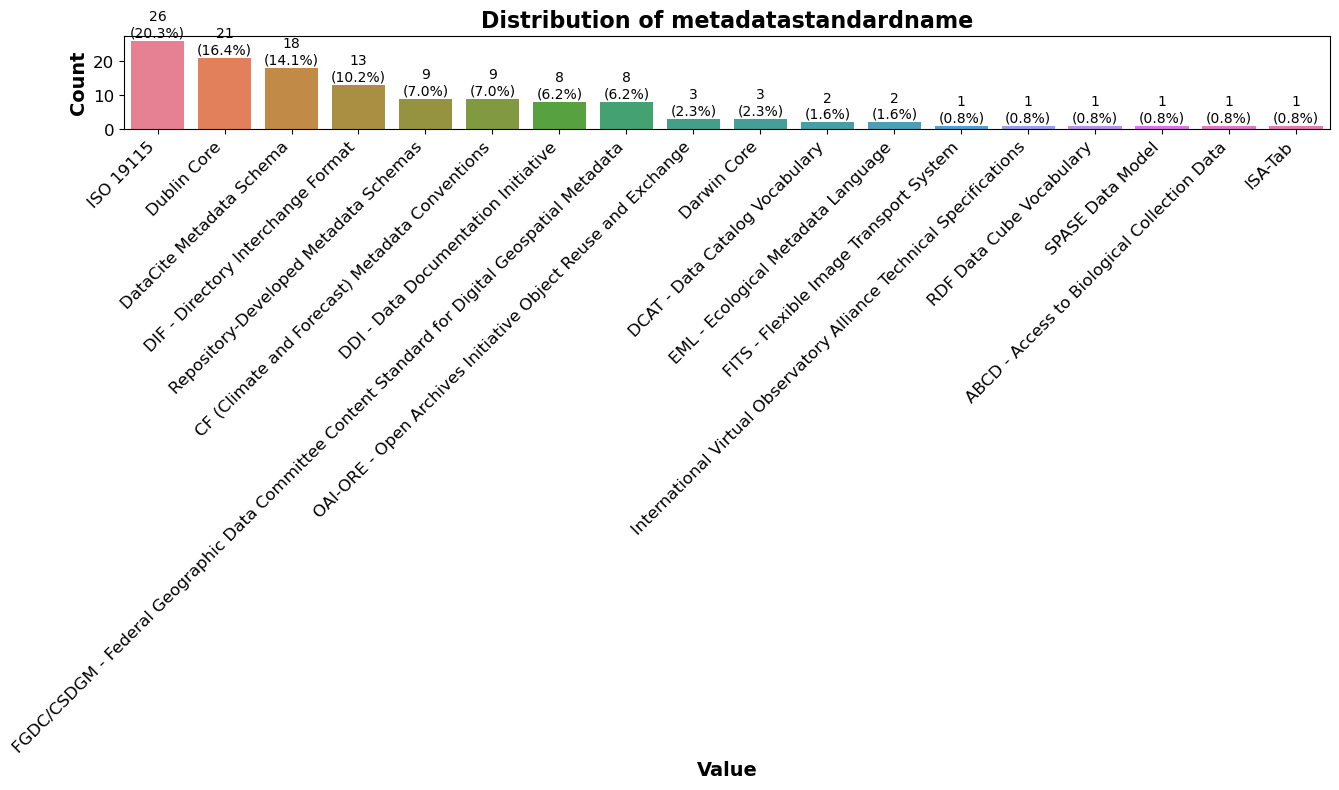

Column metadatastandardscheme has been selected.
Statistics for metadatastandardscheme written to Excel sheet.


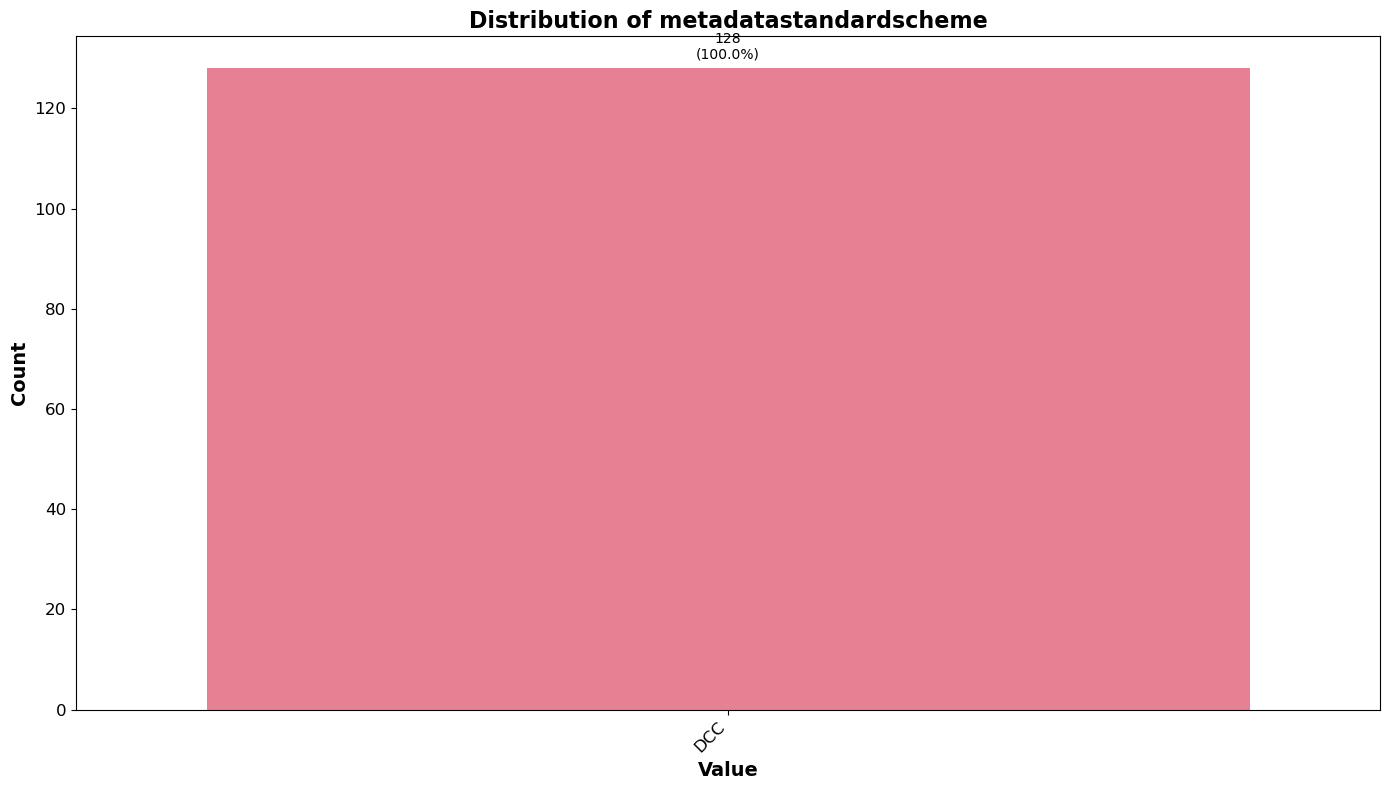

Column qualitymanagement has been selected.
Statistics for qualitymanagement written to Excel sheet.


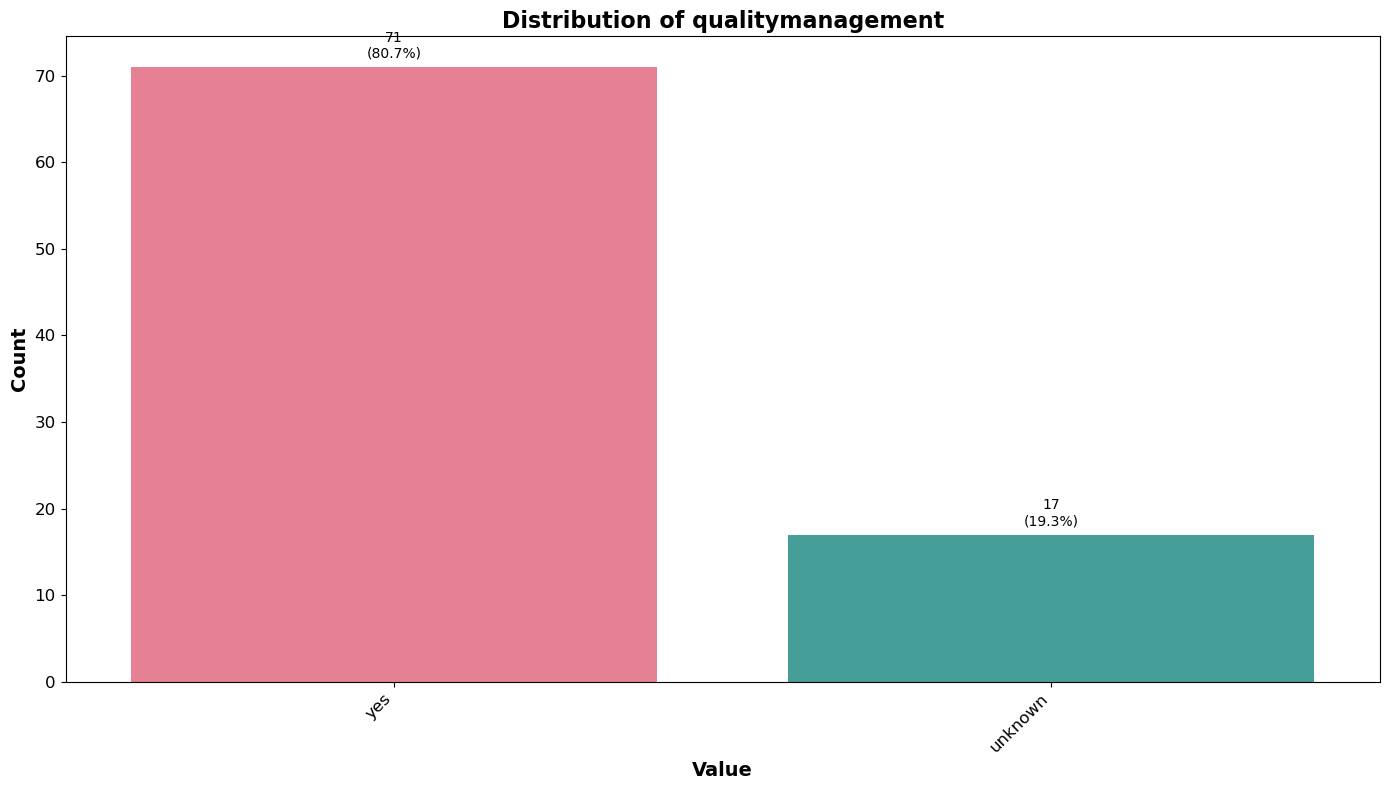

Column datauploadtype has been selected.
Statistics for datauploadtype written to Excel sheet.


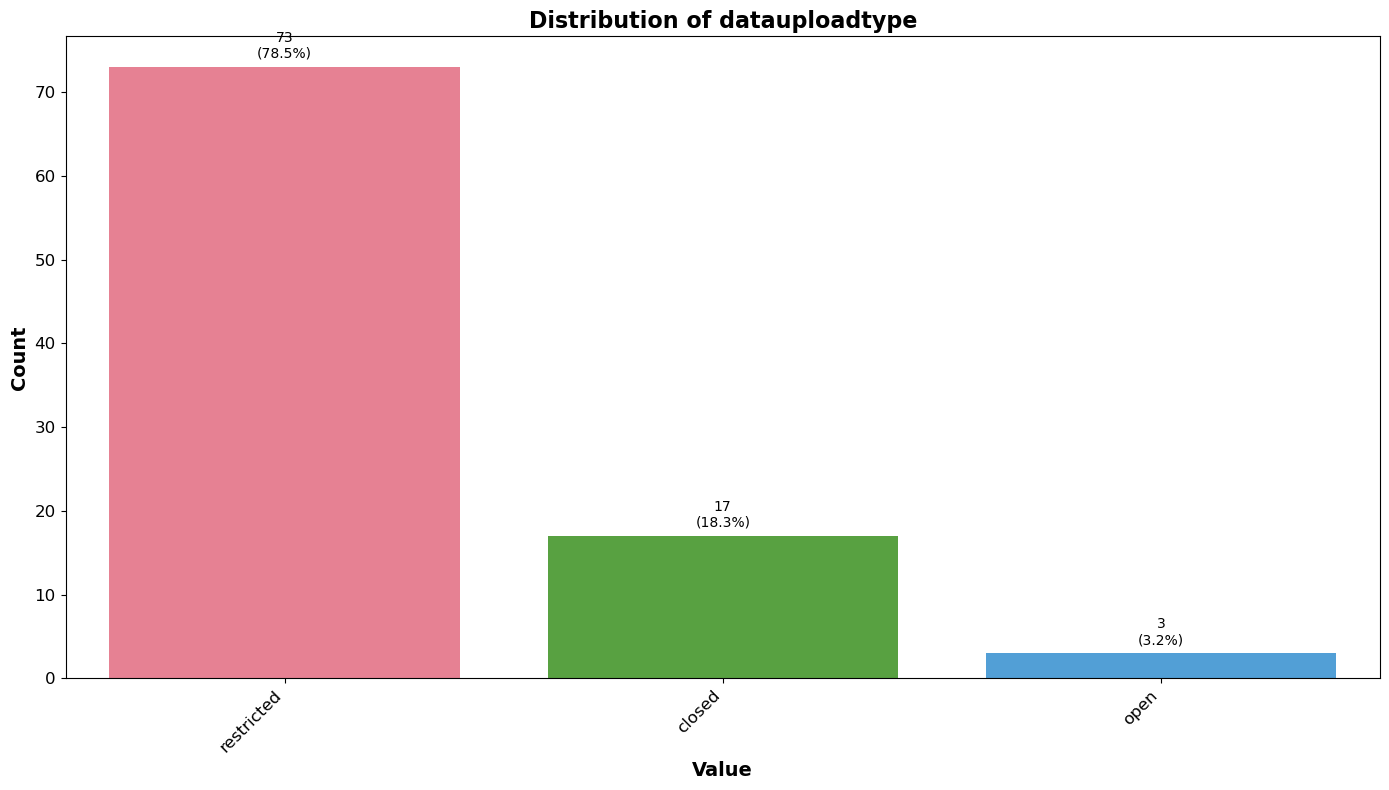

Column datauploadrestriction has been selected.
Statistics for datauploadrestriction written to Excel sheet.


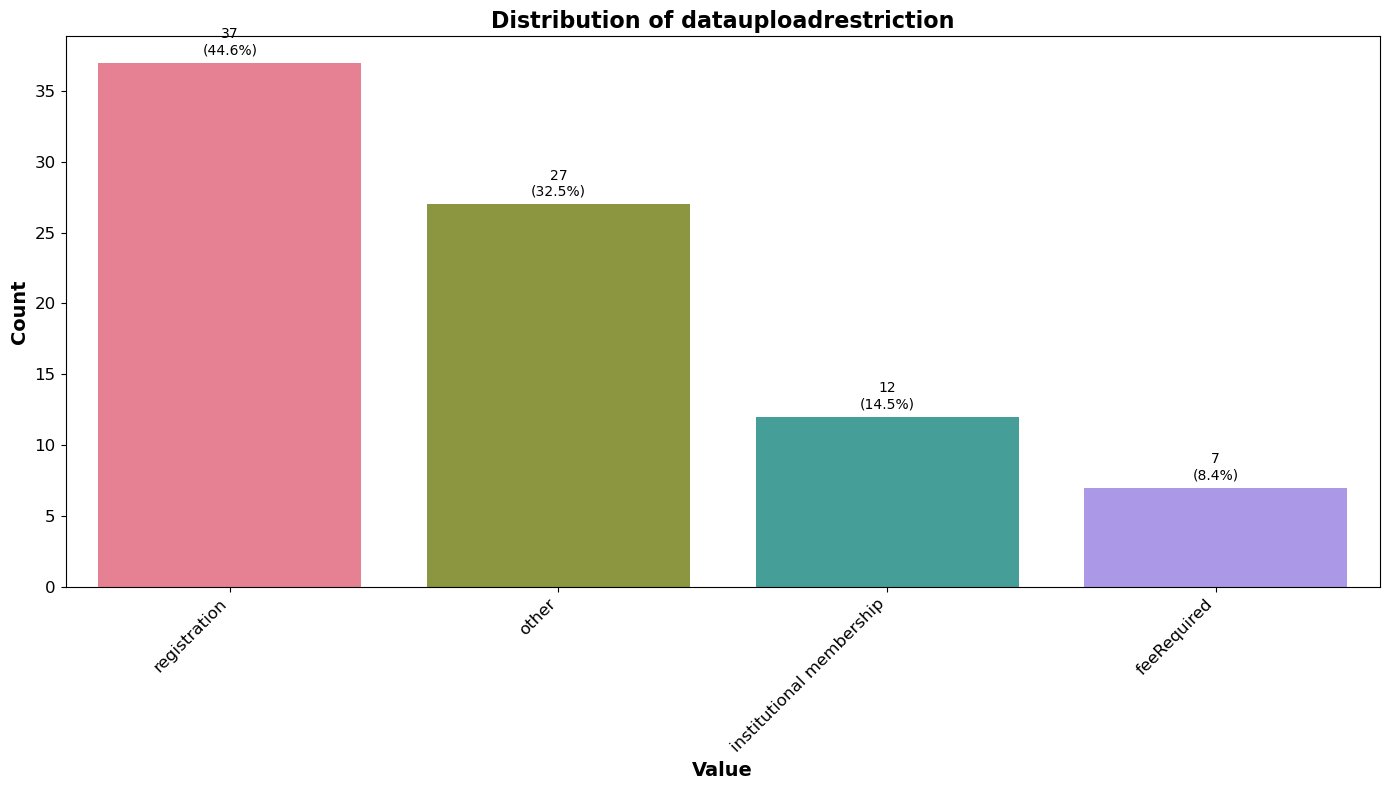

Column datauploadlicensename has been selected.
Statistics for datauploadlicensename written to Excel sheet.


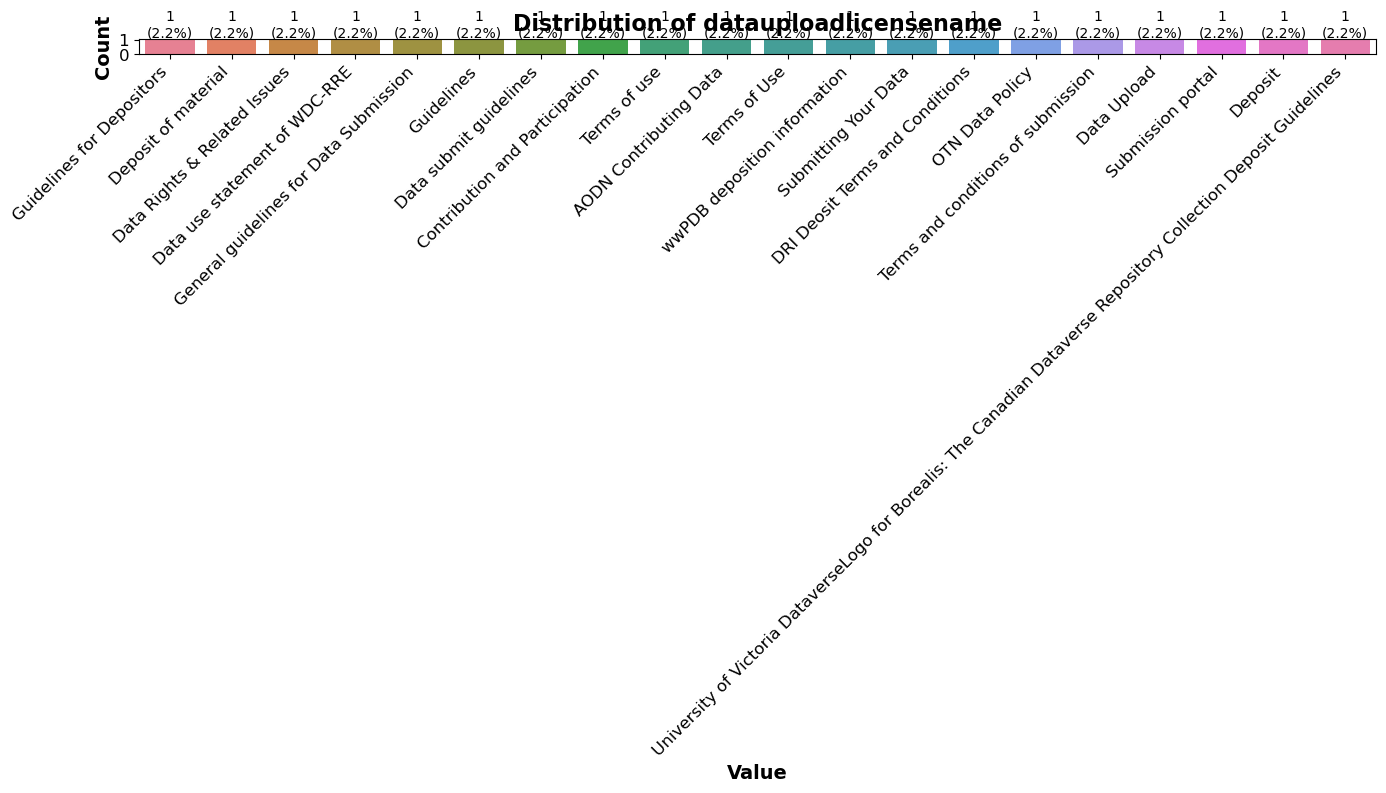

Column datalicensename has been selected.
Statistics for datalicensename written to Excel sheet.


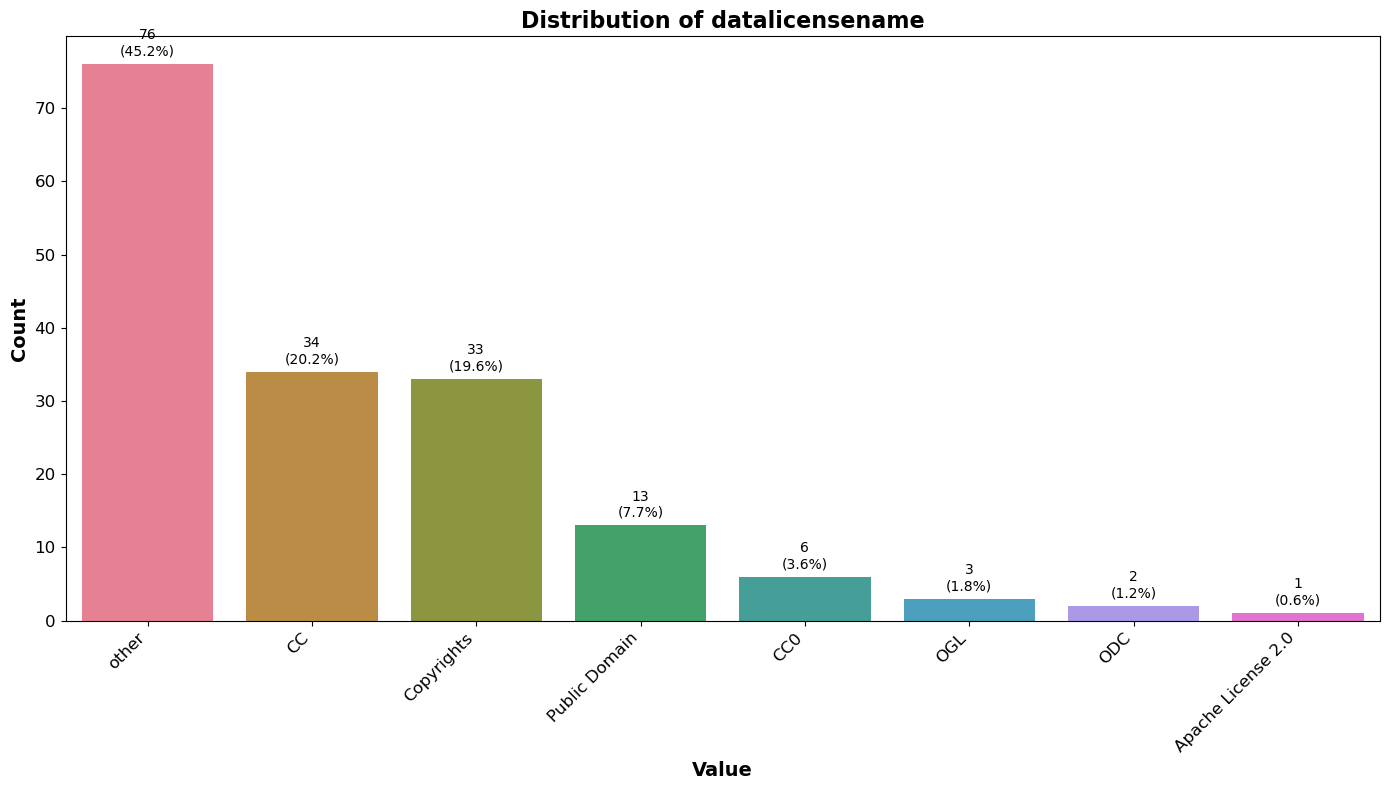

Column dataaccessrestriction has been selected.
Statistics for dataaccessrestriction written to Excel sheet.


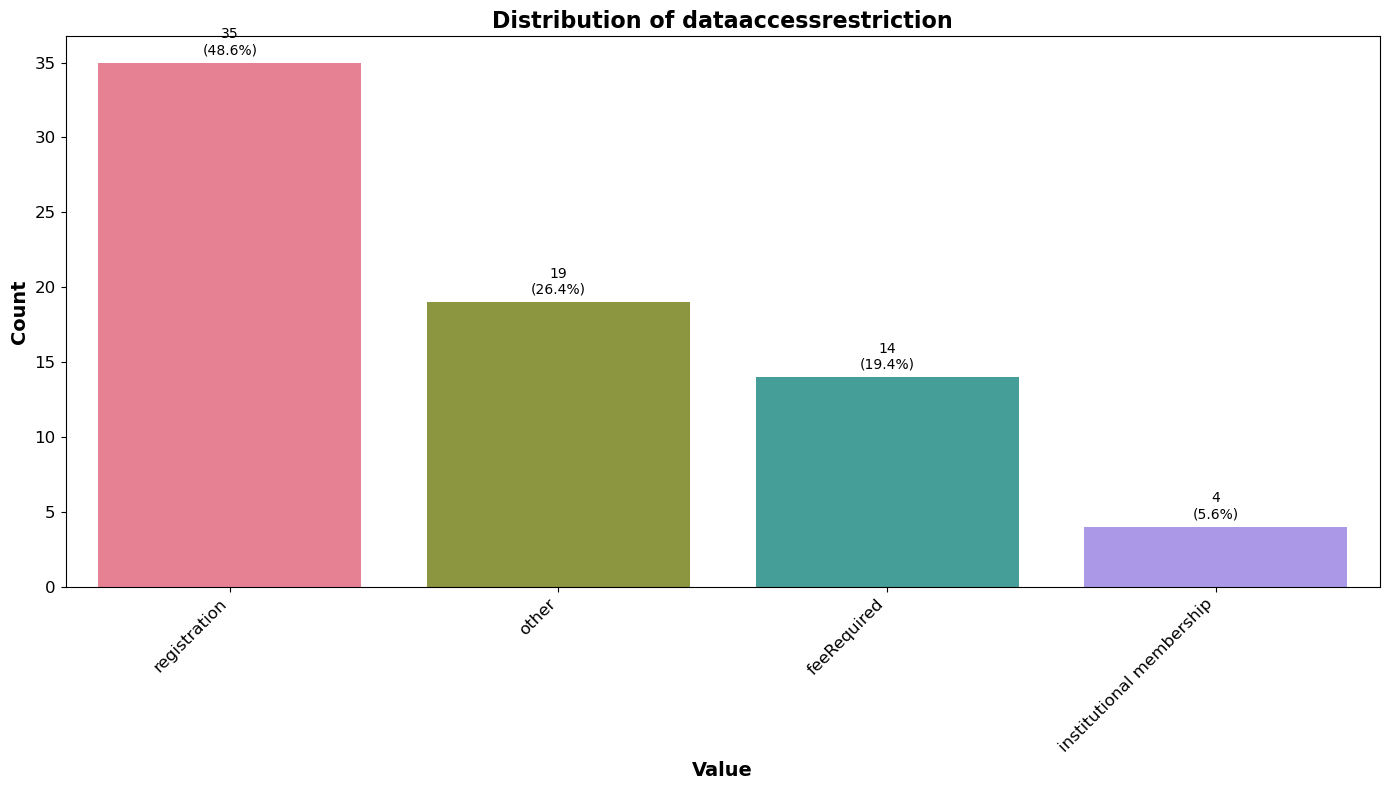

Column dataaccesstype has been selected.
Statistics for dataaccesstype written to Excel sheet.


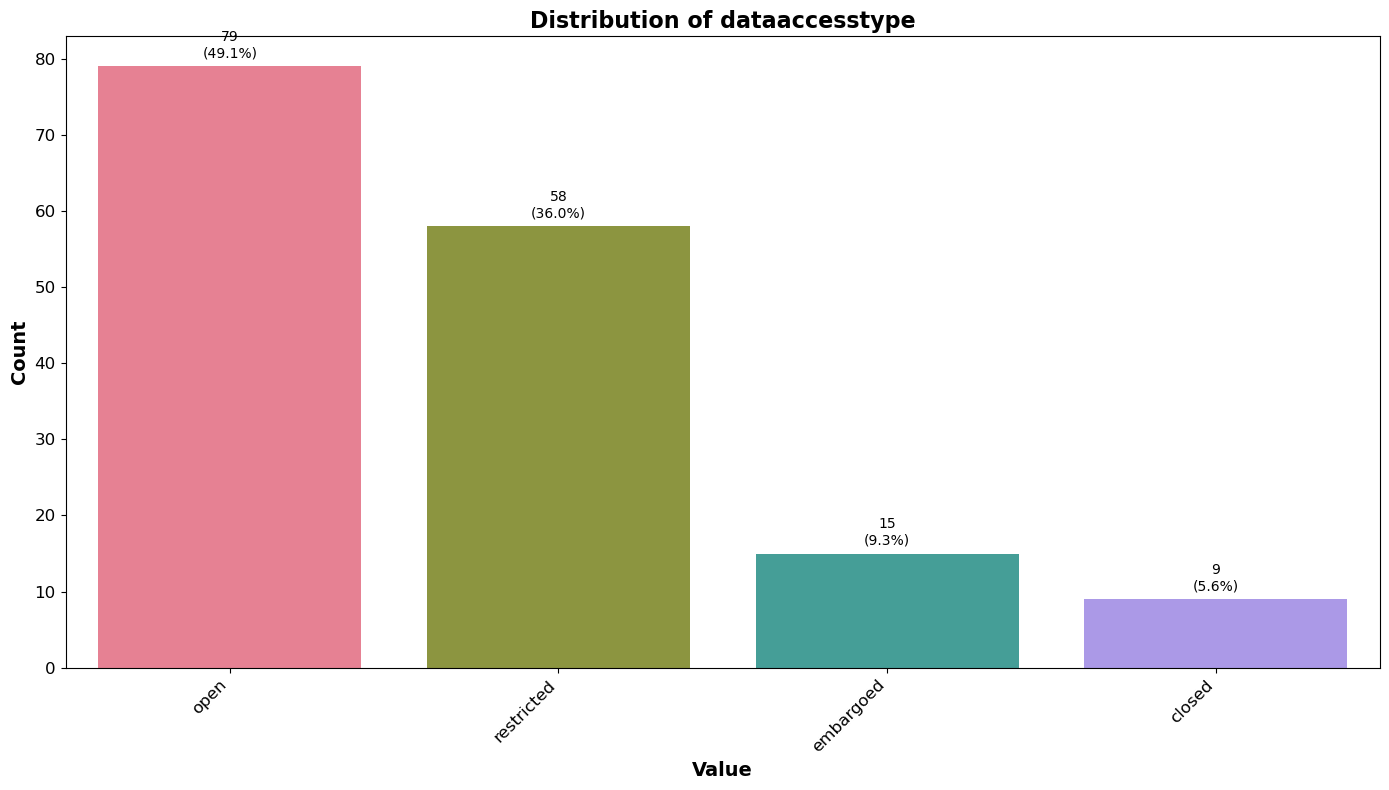

Column databaseaccessrestriction has been selected.
Statistics for databaseaccessrestriction written to Excel sheet.


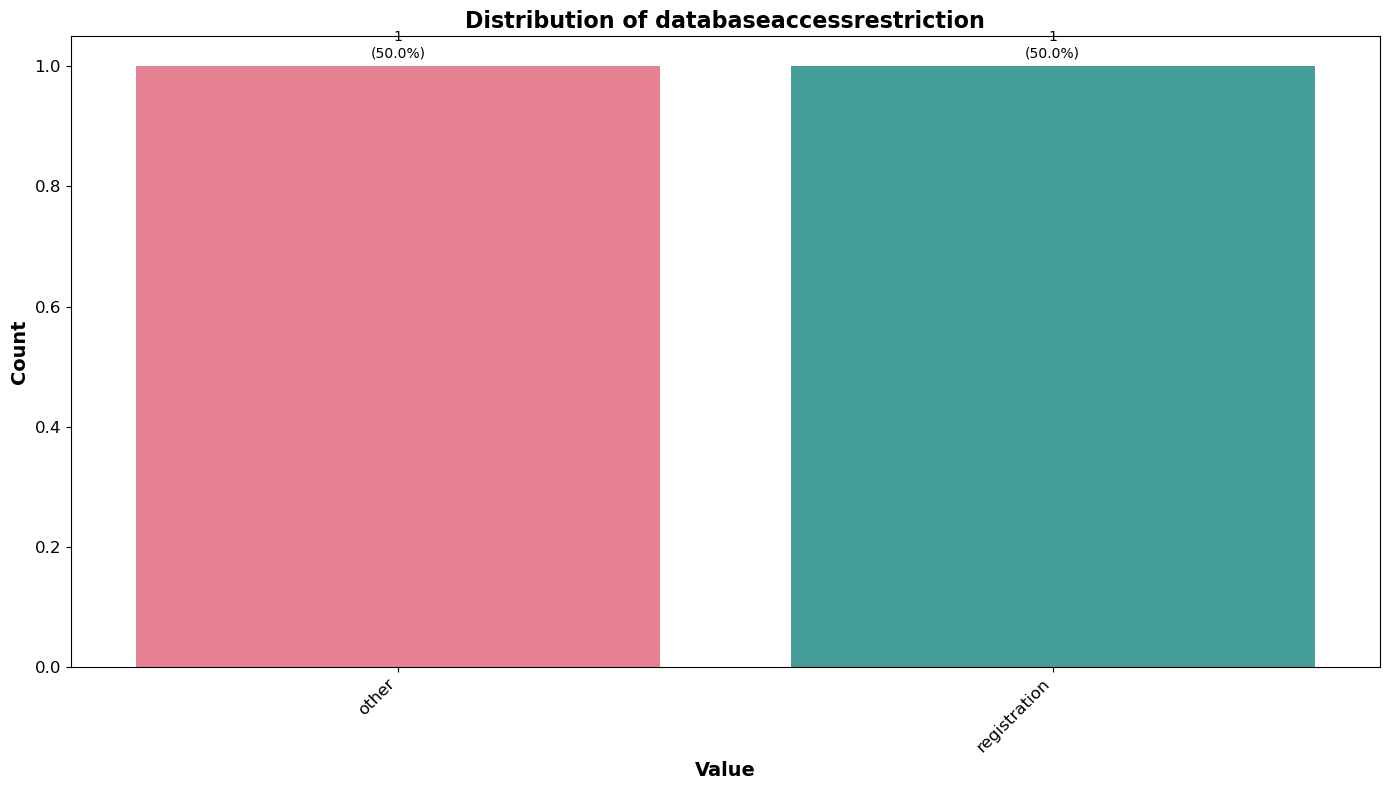

Column databaseaccesstype has been selected.
Statistics for databaseaccesstype written to Excel sheet.


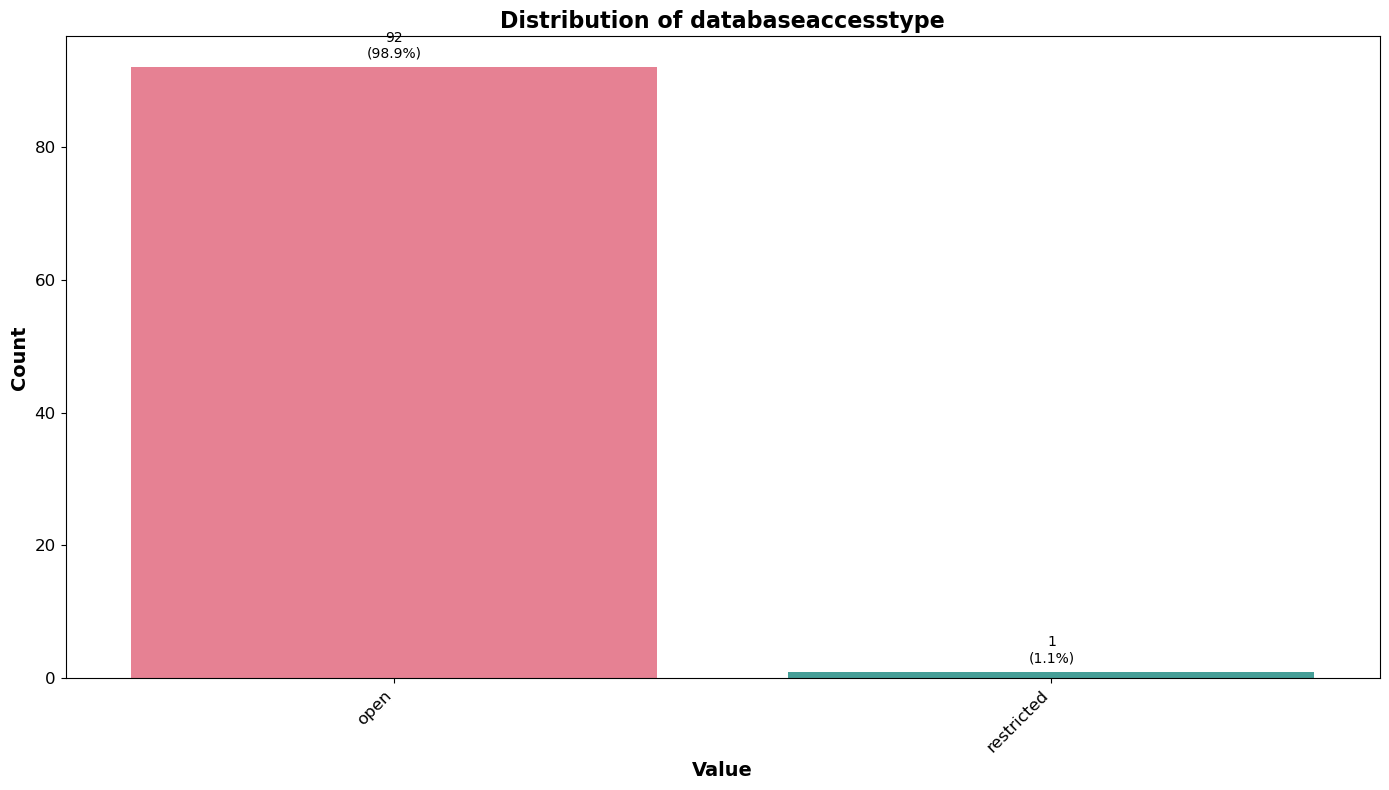

Column certificate has been selected.
Statistics for certificate written to Excel sheet.


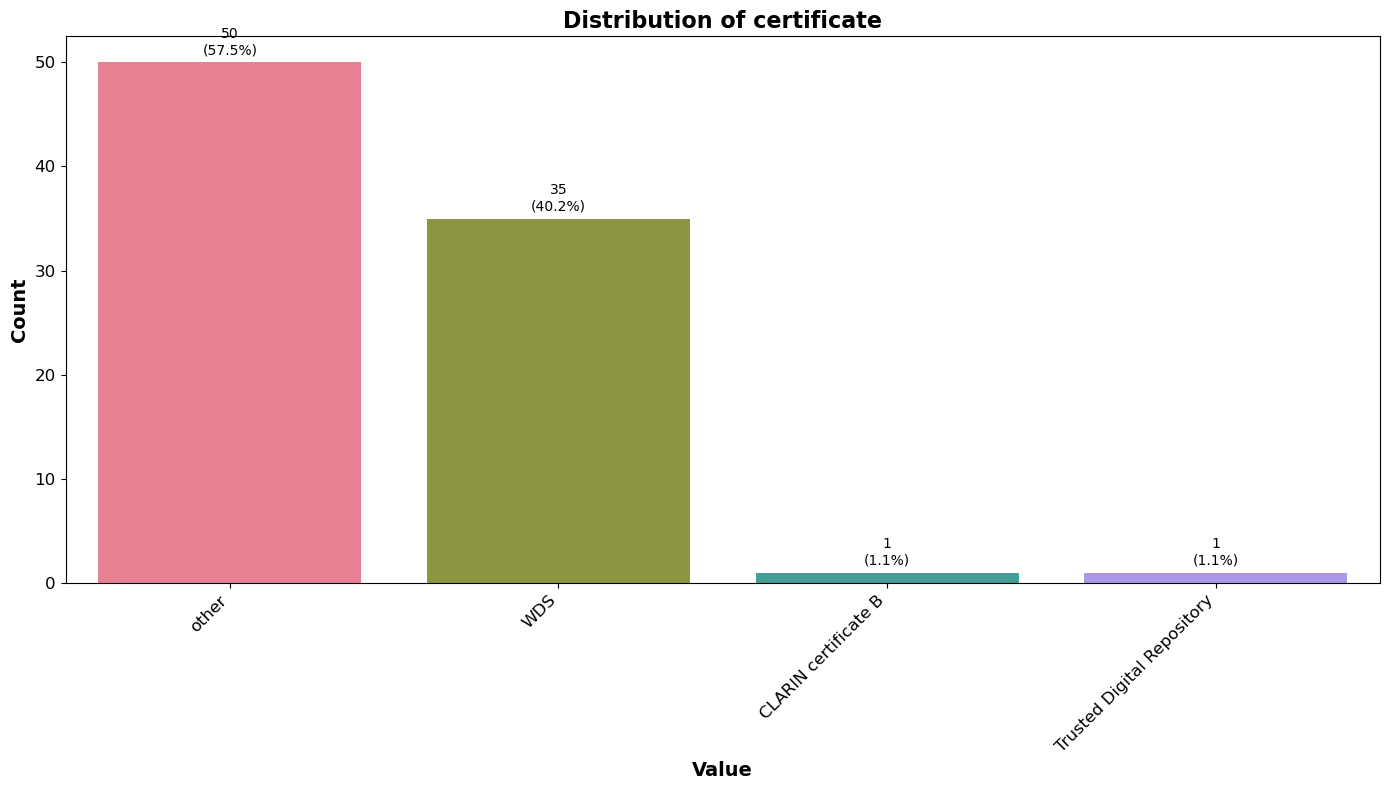

Column pidsystem has been selected.
Statistics for pidsystem written to Excel sheet.


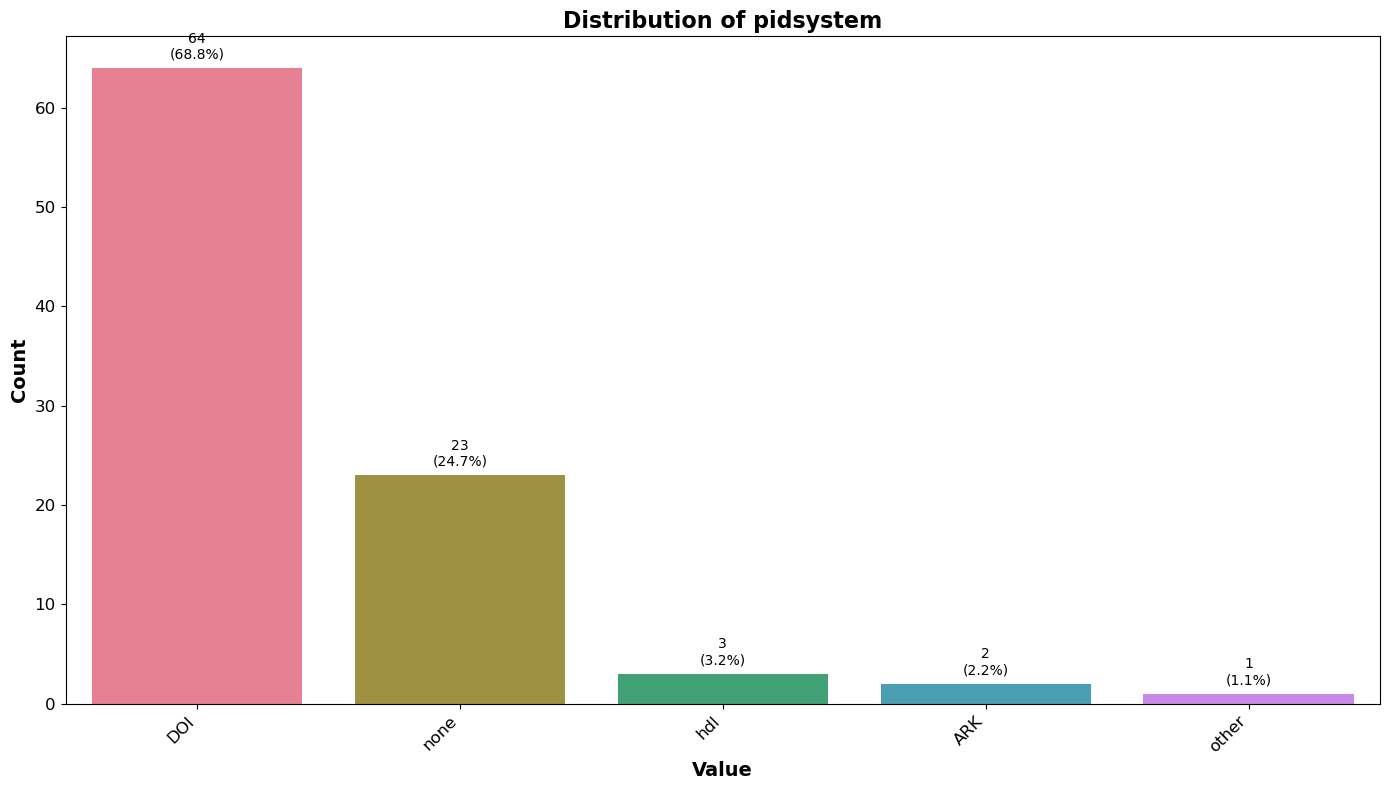

Column aidsystem has been selected.
Statistics for aidsystem written to Excel sheet.


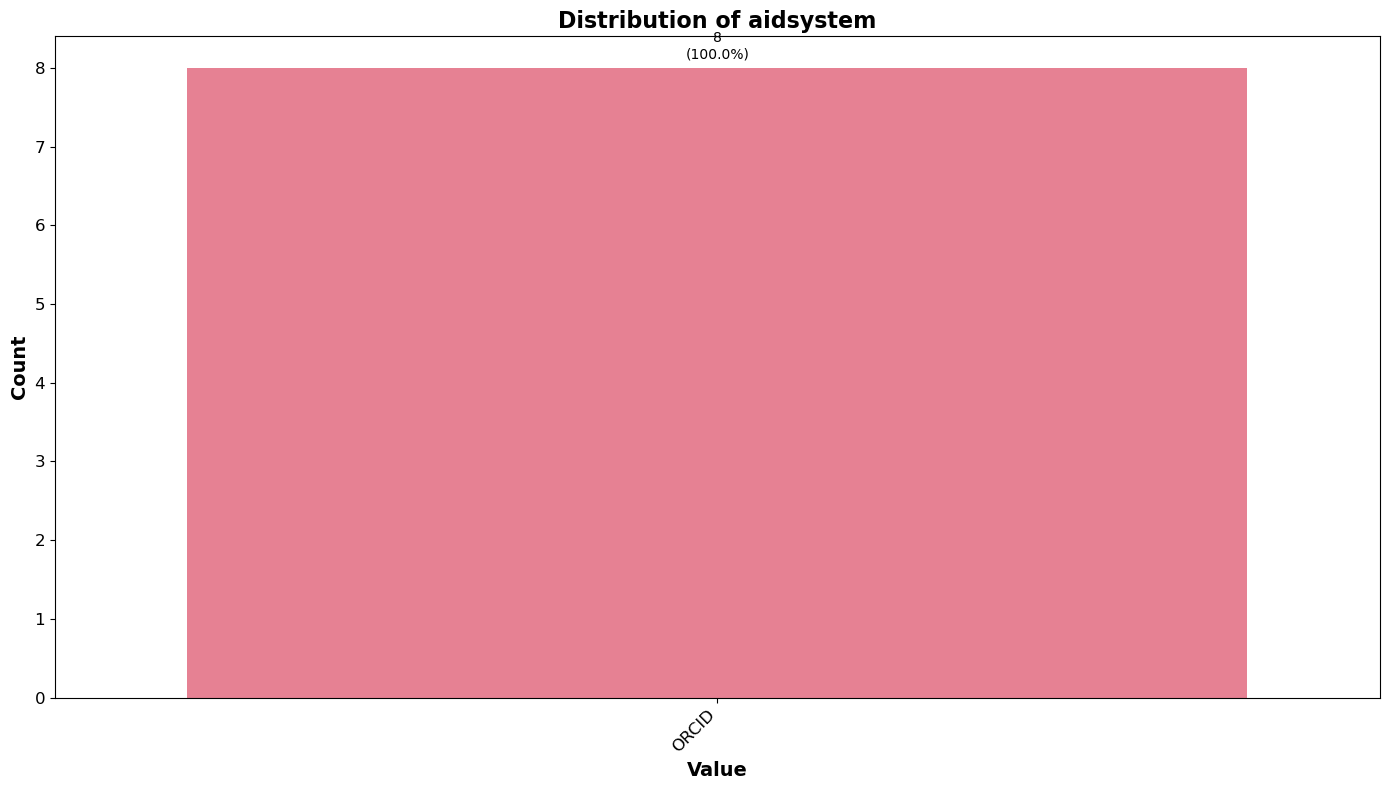

All statistics have been saved to WDS_distribution.xlsx.
Top 30 most complete rows saved to WDS_most_complete_records.csv


In [8]:
# Generate and visualize distribution statistics for DRA columns.
f.generate_column_distribution_stats(WDS_df, output_file= 'WDS_distribution.xlsx')

# Save all rows with no missing values to a CSV file.
complete_df = f.save_top_complete_rows(WDS_df, output_file= 'WDS_most_complete_records.csv')



In [9]:
WDS_df.head()

,re3data_orgidentifier,reponame,repourl,institutioncountry,repolang,institutionname,repocontact,description,subject,subjectscheme,...,datauploadrestriction,datauploadlicensename,datauploadlicenseurl,dataaccessrestriction,dataaccesstype,databaseaccessrestriction,databaseaccesstype,datalicensename,datalicenseurl,certificate
0,r3d100000001,Odum Institute Archive Dataverse,https://dataverse.unc.edu/dataverse/odum,USA,eng,Odum Institute for Research in Social Science,[https://uncch-rdmc.atlassian.net/servicedesk/...,The Odum Institute Archive Dataverse contains ...,"[1 Humanities and Social Sciences, 111 Social ...","[DFG, DFG, DFG, DFG, DFG]",...,institutional membership,NaN,NaN,"[institutional membership, other]","[embargoed, open, restricted]",NaN,open,"[CC, CC0]",[https://creativecommons.org/share-your-work/p...,other
4,r3d100000006,Archaeology Data Service,https://archaeologydataservice.ac.uk/,"[GBR, GBR, GBR, GBR]",eng,"[Arts and Humanities Research Council, Joint I...","[help@archaeologydataservice.ac.uk, https://ar...",The ADS is an accredited digital repository fo...,"[1 Humanities and Social Sciences, 101 Ancient...","[DFG, DFG, DFG, DFG, DFG]",...,"[feeRequired, other]",Guidelines for Depositors,https://archaeologydataservice.ac.uk/help-guid...,NaN,open,NaN,open,"[CC, Copyrights, Copyrights]","[https://creativecommons.org/licenses/, https:...",other
7,r3d100000012,Biological and Chemical Oceanography Data Mana...,https://www.bco-dmo.org/,"[USA, USA, USA, USA]",eng,"[DataONE, EarthCube Council of Data Facilities...","[https://www.bco-dmo.org/contact, info@bco-dmo...",The Biological and Chemical Oceanography Data ...,"[3 Natural Sciences, 313 Atmospheric Science a...","[DFG, DFG, DFG, DFG, DFG]",...,"[other, registration]",How to Get Started Contributing Data,https://www.bco-dmo.org/how-get-started,NaN,open,NaN,open,"[CC, other]","[https://creativecommons.org/licenses/by/4.0/,...",other
10,r3d100000016,Canadian Astronomy Data Centre,https://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/en/,"[CAN, CAN]","[eng, fra]","[Canadian Space Agency, National Research Coun...",cadc@nrc.gc.ca,The Canadian Astronomy Data Centre (CADC) was ...,"[3 Natural Sciences, 311 Astrophysics and Astr...","[DFG, DFG, DFG]",...,registration,NaN,NaN,registration,"[open, restricted]",NaN,open,"[Copyrights, Copyrights]",[https://laws-lois.justice.gc.ca/eng/acts/C-42...,other
24,r3d100000036,Goddard Earth Sciences Data and Information Se...,https://disc.gsfc.nasa.gov/,USA,eng,National Aeronautics and Space Administration,"[david.j.meyer@nasa.gov, gsfc-help-disc@lists....",One of twelve NASA Science Mission Directorate...,"[3 Natural Sciences, 313 Atmospheric Science a...","[DFG, DFG, DFG, DFG, DFG]",...,other,NaN,NaN,registration,restricted,NaN,open,"[Public Domain, Public Domain, other]",[https://disc.gsfc.nasa.gov/information/docume...,WDS


In [10]:
f.compare_two_completeness(dra_df, WDS_df, output_file= 'completeness_comparison.xlsx')

Completeness comparison report saved to completeness_comparison.xlsx


,completeness (%)_all,missing_count_all,completeness (%)_filtered,missing_count_filtered,difference (%)
re3data_orgidentifier,100.000000,0,100.000000,0,0.000000
reponame,100.000000,0,100.000000,0,0.000000
repourl,100.000000,0,100.000000,0,0.000000
institutioncountry,99.969961,1,100.000000,0,0.030039
repolang,99.789727,7,100.000000,0,0.210273
institutionname,99.969961,1,100.000000,0,0.030039
repocontact,95.133674,162,97.849462,2,2.715789
description,100.000000,0,100.000000,0,0.000000
subject,98.948633,35,100.000000,0,1.051367
subjectscheme,98.948633,35,100.000000,0,1.051367


In [11]:
count_matches = WDS_df['description'].str.contains(r'WDS|Core\s*Trust\s*Seal|World\s*Data\s*System', case=False, na=False).sum()
print("Number of matching rows:", count_matches)

Number of matching rows: 10


In [12]:
count_matches = WDS_df['description'].str.contains(r'Core\s*Trust\s*Seal', case=False, na=False).sum()
print("Number of matching rows:", count_matches)

Number of matching rows: 2
